In [1]:
!gdown 'https://drive.google.com/uc?id=1DhpGYQix2jOXIwcor-BEZRE03NPNGn92'
!gdown 'https://drive.google.com/uc?id=1T3TkCt4M4qgG9ZCxzxcGsv8JGADcogWh'

Downloading...
From: https://drive.google.com/uc?id=1DhpGYQix2jOXIwcor-BEZRE03NPNGn92
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Churn MOOC Prediction/edx_courses.csv
100%|██████████████████████████████████████| 1.98M/1.98M [00:00<00:00, 6.38MB/s]
Downloading...
From: https://drive.google.com/uc?id=1T3TkCt4M4qgG9ZCxzxcGsv8JGADcogWh
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Churn MOOC Prediction/edx_students_metrics.csv
100%|██████████████████████████████████████| 66.9k/66.9k [00:00<00:00, 3.14MB/s]


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
working_dir = os.getcwd()
edx_courses_path = working_dir+'/edx_courses.csv'
edx_students_metrics_path = working_dir+'/edx_students_metrics.csv'

### Datasets 

`edx_course.csv` dataset was taken from https://www.kaggle.com/datasets/imuhammad/edx-courses. This dataset contains information about 975 courses that are currently available on the edx.org platform. 

Whereas, `edx_students_metrics.csv` dataset was taken from https://www.kaggle.com/datasets/edx/course-study. This report provides data on 290 Harvard and MIT online courses, 250k certifications, 4.5M participants, and 28M participant hours on the edX platform since 2012. This dataset is related to students' metrics.

In [4]:
edx_courses = read_csv(edx_courses_path)
edx_students_metrics = read_csv(edx_students_metrics_path)

In [5]:
edx_courses.head()

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             summary n_enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

                                         instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   

                        subject language subtitles         course_effort  \
0  Education & Teacher Training  English   English    2–3 hours per week   
1              Computer Science  English   English    2–4 hours per week   
2              Computer Science  English   English   6–18 hours per week   
3    Data Analysis & Statistics  English   English  10–15 hours per week   
4              Computer Science  English   English    5–7 hours per week   

  course_length                                         price  \
0       2 Weeks   FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks   FREE-Add a Verified Certificate for $49 USD   
2      12 Weeks   FREE-Add a Verified Certificate for $90 USD   
3      13 Weeks  FREE-Add a Verified Certificate for $199 USD   
4       4 Weeks  FREE-Add a Verified Certificate for $249 USD   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   
3  In the last decade, the amount of data availab...   
4  Begin your journey in a new career in marketin...   

                                     course_syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          course_url  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...  
3      https://www.edx.org/course/the-analytics-edge  
4  https://www.edx.org/course/marketing-analytics...

In [6]:
edx_courses.columns = ['EDX_Title', 'Summary', 'N_Enrolled', 'Course_Type', 'Institution_Provider', 'EDX_Instructors',
                      'Level', 'EDX_Subject', 'Language', 'Subtitles', 'Course_Effort', 'Course_Length', 'EDX_Price',
                      'Course_Description', 'Course_Syllabus', 'Course_URL']

In [7]:
edx_courses.head(5)

EDX_Title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             Summary N_Enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   

                           Course_Type                   Institution_Provider  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

                                     EDX_Instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   

                    EDX_Subject Language Subtitles         Course_Effort  \
0  Education & Teacher Training  English   English    2–3 hours per week   
1              Computer Science  English   English    2–4 hours per week   
2              Computer Science  English   English   6–18 hours per week   
3    Data Analysis & Statistics  English   English  10–15 hours per week   
4              Computer Science  English   English    5–7 hours per week   

  Course_Length                                     EDX_Price  \
0       2 Weeks   FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks   FREE-Add a Verified Certificate for $49 USD   
2      12 Weeks   FREE-Add a Verified Certificate for $90 USD   
3      13 Weeks  FREE-Add a Verified Certificate for $199 USD   
4       4 Weeks  FREE-Add a Verified Certificate for $249 USD   

                                  Course_Description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   
3  In the last decade, the amount of data availab...   
4  Begin your journey in a new career in marketin...   

                                     Course_Syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Course_URL  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...  
3      https://www.edx.org/course/the-analytics-edge  
4  https://www.edx.org/course/marketing-analytics...

In [8]:
edx_courses.tail(5)

EDX_Title  \
970  Leaders in Citizen Security and Justice Manage...   
971              Pattern Studying and Making | 图案审美与创作   
972  Computational Neuroscience: Neuronal Dynamics ...   
973  Cities and the Challenge of Sustainable Develo...   
974                      MathTrackX: Special Functions   

                                               Summary N_Enrolled  \
970  Learn about the latest in prevention, police a...        NaN   
971  Fantastic experiences in beauty and its repres...        NaN   
972  This course explains the mathematical and comp...     11,246   
973  What is a sustainable city? Learn the basics h...      8,775   
974  Understand trigonometric, exponential and loga...        NaN   

                 Course_Type                      Institution_Provider  \
970  Self-paced on your time           Inter-American Development Bank   
971  Self-paced on your time                       Tsinghua University   
972  Self-paced on your time  École polytechnique fédérale de Lausanne   
973  Self-paced on your time                               SDG Academy   
974  Self-paced on your time                    University of Adelaide   

                                       EDX_Instructors         Level  \
970  Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...  Intermediate   
971                                         Yuehua Nie  Introductory   
972                                   Wulfram Gerstner      Advanced   
973                                   Jeffrey D. Sachs  Introductory   
974                                    Dr David Butler  Introductory   

                 EDX_Subject Language    Subtitles       Course_Effort  \
970          Social Sciences  English      English  4–5 hours per week   
971            Art & Culture       中文  English, 中文  3–5 hours per week   
972  Biology & Life Sciences  English      English  4–6 hours per week   
973    Environmental Studies  English      English  1–2 hours per week   
974                     Math  English      English  3–6 hours per week   

    Course_Length                                     EDX_Price  \
970      10 Weeks   FREE-Add a Verified Certificate for $25 USD   
971      12 Weeks  FREE-Add a Verified Certificate for $139 USD   
972       6 Weeks  FREE-Add a Verified Certificate for $139 USD   
973       1 Weeks   FREE-Add a Verified Certificate for $25 USD   
974       4 Weeks   FREE-Add a Verified Certificate for $79 USD   

                                    Course_Description  \
970  The high rates of crime and violence are two o...   
971  Are you an original designer? Or a DIY fancier...   
972  What happens in your brain when you make a dec...   
973  According to the United Nations, urbanization ...   
974  This course is part two of the MathTrackX XSer...   

                                       Course_Syllabus  \
970                                                NaN   
971                                                NaN   
972  Textbook: Neuronal Dynamics - from single neur...   
973  Module 1: Introduction to the SDGsProfessor Je...   
974                                                NaN   

                                            Course_URL  
970  https://www.edx.org/course/leaders-in-citizen-...  
971  https://www.edx.org/course/pattern-studying-an...  
972  https://www.edx.org/course/computational-neuro...  
973  https://www.edx.org/course/cities-and-the-chal...  
974  https://www.edx.org/course/mathtrackx-special-...

In [9]:
edx_courses.shape

(975, 16)

In [10]:
edx_students_metrics.head()

Institution Course Number Launch Date  \
0        MITx        6.002x  09/05/2012   
1        MITx         6.00x  09/26/2012   
2        MITx        3.091x  10/09/2012   
3    HarvardX         CS50x  10/15/2012   
4    HarvardX        PH207x  10/15/2012   

                                        Course Title  \
0                           Circuits and Electronics   
1   Introduction to Computer Science and Programming   
2              Introduction to Solid State Chemistry   
3                   Introduction to Computer Science   
4  Health in Numbers: Quantitative Methods in Cli...   

                                         Instructors  \
0                                     Khurram Afridi   
1            Eric Grimson, John Guttag, Chris Terman   
2                                       Michael Cima   
3  David Malan, Nate Hardison, Rob Bowden, Tommy ...   
4                 Earl Francis Cook, Marcello Pagano   

                                      Course Subject  Year  \
0  Science, Technology, Engineering, and Mathematics     1   
1                                   Computer Science     1   
2  Science, Technology, Engineering, and Mathematics     1   
3                                   Computer Science     1   
4             Government, Health, and Social Science     1   

   Honor Code Certificates  Participants (Course Content Accessed)  \
0                        1                                   36105   
1                        1                                   62709   
2                        1                                   16663   
3                        1                                  129400   
4                        1                                   52521   

   Audited (> 50% Course Content Accessed)  ...  \
0                                     5431  ...   
1                                     8949  ...   
2                                     2855  ...   
3                                    12888  ...   
4                                    10729  ...   

   % Certified of > 50% Course Content Accessed  % Played Video  \
0                                         54.98            83.2   
1                                         64.05           89.14   
2                                         72.85           87.49   
3                                         11.11               0   
4                                         47.12           77.45   

   % Posted in Forum  % Grade Higher Than Zero Total Course Hours (Thousands)  \
0               8.17                     28.97                         418.94   
1              14.38                     39.50                         884.04   
2              14.42                     34.89                         227.55   
3               0.00                      1.11                         220.90   
4              15.98                     32.52                         804.41   

   Median Hours for Certification  Median Age  % Male  % Female  \
0                           64.45        26.0   88.28     11.72   
1                           78.53        28.0   83.50     16.50   
2                           61.28        27.0   70.32     29.68   
3                            0.00        28.0   80.02     19.98   
4                           76.10        32.0   56.78     43.22   

   % Bachelor's Degree or Higher  
0                          60.68  
1                          63.04  
2                          58.76  
3                          58.78  
4                          88.33  

[5 rows x 23 columns]

In [11]:
edx_students_metrics.columns=['Institution', 'Course_Number', 'Launch_Date', 'Title', 'Instructors',
                        'Course_Subject', 'Year', 'Honor_Code_Certificates', 'Participants',
                         'Number_Students_Audited_Higher_50P_Content','Number_Students_Certified', 'Percentage_Audited', 
                        'Percentage_Certified','Percentage_Greater_50P_Course_Content_Accessed', 
                              'Percentage_Played_Video','Percentage_Posted_In_Forum',
                        'Percentage_Grade_Higher_Than_Zero','Total_Course_Hours_k', 'Median_Hours_For_Certification', 
                            'Median_Age','Percentage_Male', 'Percentage_Female', 'Percentage_Bachelor_Or_Higher']

In [12]:
edx_students_metrics.head(5)

Institution Course_Number Launch_Date  \
0        MITx        6.002x  09/05/2012   
1        MITx         6.00x  09/26/2012   
2        MITx        3.091x  10/09/2012   
3    HarvardX         CS50x  10/15/2012   
4    HarvardX        PH207x  10/15/2012   

                                               Title  \
0                           Circuits and Electronics   
1   Introduction to Computer Science and Programming   
2              Introduction to Solid State Chemistry   
3                   Introduction to Computer Science   
4  Health in Numbers: Quantitative Methods in Cli...   

                                         Instructors  \
0                                     Khurram Afridi   
1            Eric Grimson, John Guttag, Chris Terman   
2                                       Michael Cima   
3  David Malan, Nate Hardison, Rob Bowden, Tommy ...   
4                 Earl Francis Cook, Marcello Pagano   

                                      Course_Subject  Year  \
0  Science, Technology, Engineering, and Mathematics     1   
1                                   Computer Science     1   
2  Science, Technology, Engineering, and Mathematics     1   
3                                   Computer Science     1   
4             Government, Health, and Social Science     1   

   Honor_Code_Certificates  Participants  \
0                        1         36105   
1                        1         62709   
2                        1         16663   
3                        1        129400   
4                        1         52521   

   Number_Students_Audited_Higher_50P_Content  ...  \
0                                        5431  ...   
1                                        8949  ...   
2                                        2855  ...   
3                                       12888  ...   
4                                       10729  ...   

   Percentage_Greater_50P_Course_Content_Accessed  Percentage_Played_Video  \
0                                           54.98                     83.2   
1                                           64.05                    89.14   
2                                           72.85                    87.49   
3                                           11.11                        0   
4                                           47.12                    77.45   

   Percentage_Posted_In_Forum  Percentage_Grade_Higher_Than_Zero  \
0                        8.17                              28.97   
1                       14.38                              39.50   
2                       14.42                              34.89   
3                        0.00                               1.11   
4                       15.98                              32.52   

  Total_Course_Hours_k  Median_Hours_For_Certification  Median_Age  \
0               418.94                           64.45        26.0   
1               884.04                           78.53        28.0   
2               227.55                           61.28        27.0   
3               220.90                            0.00        28.0   
4               804.41                           76.10        32.0   

   Percentage_Male  Percentage_Female  Percentage_Bachelor_Or_Higher  
0            88.28              11.72                          60.68  
1            83.50              16.50                          63.04  
2            70.32              29.68                          58.76  
3            80.02              19.98                          58.78  
4            56.78              43.22                          88.33  

[5 rows x 23 columns]

In [13]:
edx_students_metrics.shape

(290, 23)

#### Searching for null data

In [14]:
edx_courses.isna().sum()

EDX_Title                 0
Summary                  53
N_Enrolled              120
Course_Type               0
Institution_Provider      0
EDX_Instructors           3
Level                     0
EDX_Subject               0
Language                  0
Subtitles                 3
Course_Effort             0
Course_Length             0
EDX_Price                 0
Course_Description       40
Course_Syllabus         558
Course_URL                0
dtype: int64

In [15]:
edx_students_metrics.isnull().sum()

Institution                                       0
Course_Number                                     0
Launch_Date                                       0
Title                                             0
Instructors                                       1
Course_Subject                                    0
Year                                              0
Honor_Code_Certificates                           0
Participants                                      0
Number_Students_Audited_Higher_50P_Content        0
Number_Students_Certified                         0
Percentage_Audited                                0
Percentage_Certified                              0
Percentage_Greater_50P_Course_Content_Accessed    0
Percentage_Played_Video                           0
Percentage_Posted_In_Forum                        0
Percentage_Grade_Higher_Than_Zero                 0
Total_Course_Hours_k                              0
Median_Hours_For_Certification                    0
Median_Age  

#### Dropping null data

In [16]:
edx_students_metrics.dropna(how='any', inplace=True)

In [17]:
edx_students_metrics.isna().sum()

Institution                                       0
Course_Number                                     0
Launch_Date                                       0
Title                                             0
Instructors                                       0
Course_Subject                                    0
Year                                              0
Honor_Code_Certificates                           0
Participants                                      0
Number_Students_Audited_Higher_50P_Content        0
Number_Students_Certified                         0
Percentage_Audited                                0
Percentage_Certified                              0
Percentage_Greater_50P_Course_Content_Accessed    0
Percentage_Played_Video                           0
Percentage_Posted_In_Forum                        0
Percentage_Grade_Higher_Than_Zero                 0
Total_Course_Hours_k                              0
Median_Hours_For_Certification                    0
Median_Age  

#### Some preprocessing performance

In [18]:
edx_students_metrics['Launch_Date'] = pd.to_datetime(edx_students_metrics['Launch_Date'])

In [19]:
edx_students_metrics.head(4)

Institution Course_Number Launch_Date  \
0        MITx        6.002x  2012-09-05   
1        MITx         6.00x  2012-09-26   
2        MITx        3.091x  2012-10-09   
3    HarvardX         CS50x  2012-10-15   

                                              Title  \
0                          Circuits and Electronics   
1  Introduction to Computer Science and Programming   
2             Introduction to Solid State Chemistry   
3                  Introduction to Computer Science   

                                         Instructors  \
0                                     Khurram Afridi   
1            Eric Grimson, John Guttag, Chris Terman   
2                                       Michael Cima   
3  David Malan, Nate Hardison, Rob Bowden, Tommy ...   

                                      Course_Subject  Year  \
0  Science, Technology, Engineering, and Mathematics     1   
1                                   Computer Science     1   
2  Science, Technology, Engineering, and Mathematics     1   
3                                   Computer Science     1   

   Honor_Code_Certificates  Participants  \
0                        1         36105   
1                        1         62709   
2                        1         16663   
3                        1        129400   

   Number_Students_Audited_Higher_50P_Content  ...  \
0                                        5431  ...   
1                                        8949  ...   
2                                        2855  ...   
3                                       12888  ...   

   Percentage_Greater_50P_Course_Content_Accessed  Percentage_Played_Video  \
0                                           54.98                     83.2   
1                                           64.05                    89.14   
2                                           72.85                    87.49   
3                                           11.11                        0   

   Percentage_Posted_In_Forum  Percentage_Grade_Higher_Than_Zero  \
0                        8.17                              28.97   
1                       14.38                              39.50   
2                       14.42                              34.89   
3                        0.00                               1.11   

  Total_Course_Hours_k  Median_Hours_For_Certification  Median_Age  \
0               418.94                           64.45        26.0   
1               884.04                           78.53        28.0   
2               227.55                           61.28        27.0   
3               220.90                            0.00        28.0   

   Percentage_Male  Percentage_Female  Percentage_Bachelor_Or_Higher  
0            88.28              11.72                          60.68  
1            83.50              16.50                          63.04  
2            70.32              29.68                          58.76  
3            80.02              19.98                          58.78  

[4 rows x 23 columns]

### Bivariate scatter plots

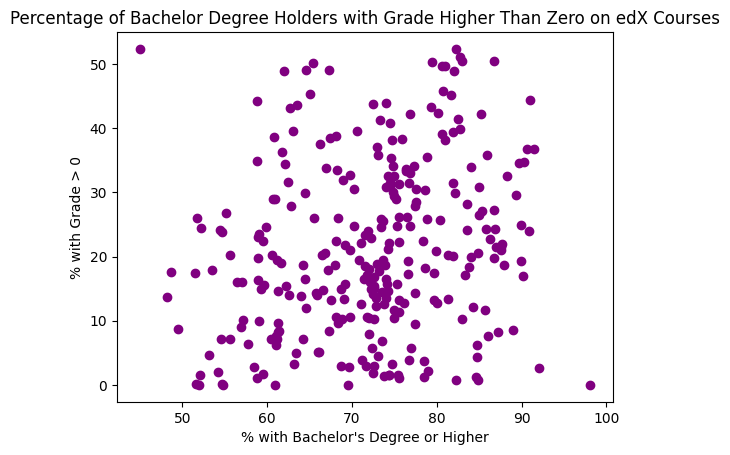

In [20]:
plt.scatter(x='Percentage_Bachelor_Or_Higher', y='Percentage_Grade_Higher_Than_Zero', data=edx_students_metrics, color='purple')
plt.title('Percentage of Bachelor Degree Holders with Grade Higher Than Zero on edX Courses')
plt.xlabel("% with Bachelor's Degree or Higher")
plt.ylabel("% with Grade > 0")
plt.show()

According to the above scatter plot, it can be said that there is a strong-sort of statistical relationship between academic history and course performance.

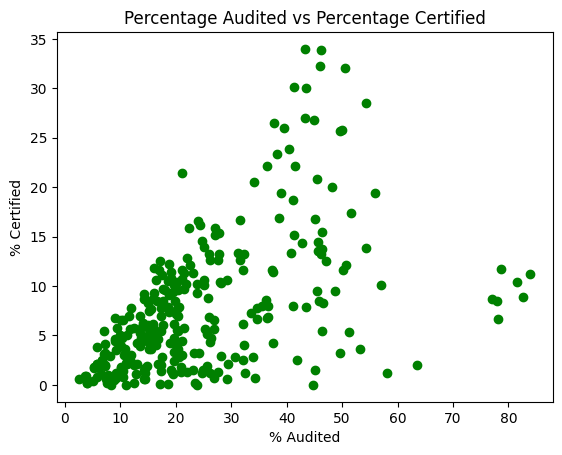

In [21]:
plt.scatter(x='Percentage_Audited', y='Percentage_Certified', data=edx_students_metrics, color='green')
plt.title('Percentage Audited vs Percentage Certified')
plt.xlabel("% Audited")
plt.ylabel("% Certified")
plt.show()

To tackle student churn, it is required to convert free trial users into paying customers. The graph above shows that it is less likely for students auditing a course to become certificate holders.

Text(0, 0.5, '# Students Auditing > 50% of the Course')

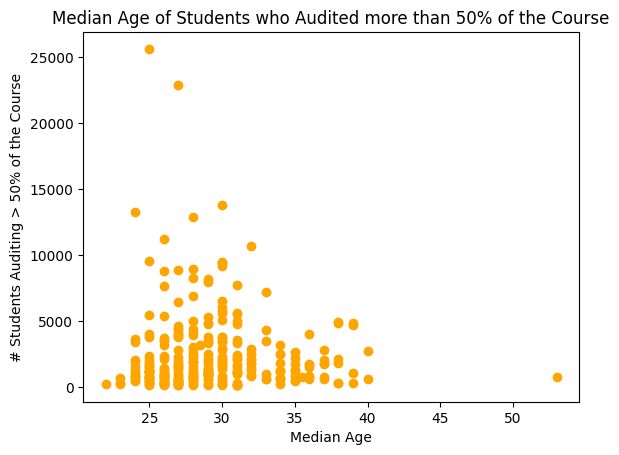

In [22]:
plt.scatter(x='Median_Age', y='Number_Students_Audited_Higher_50P_Content', data=edx_students_metrics, color='orange')
plt.title('Median Age of Students who Audited more than 50% of the Course')
plt.xlabel('Median Age')
plt.ylabel('# Students Auditing > 50% of the Course')

Text(0, 0.5, '% Certified')

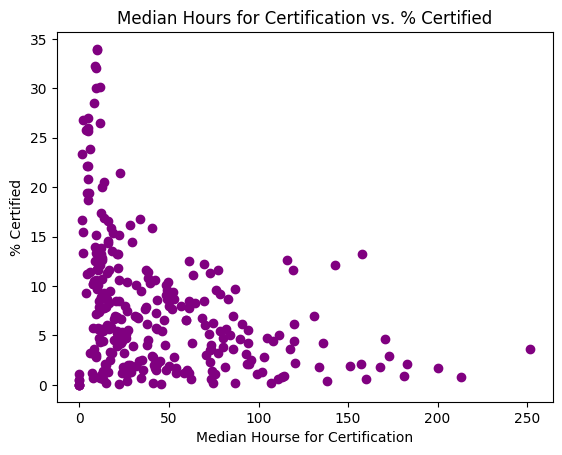

In [23]:
plt.scatter(x='Median_Hours_For_Certification', y='Percentage_Certified', data=edx_students_metrics, color='purple')
plt.title('Median Hours for Certification vs. % Certified')
plt.xlabel('Median Hourse for Certification')
plt.ylabel('% Certified')

Text(0, 0.5, '% Audited')

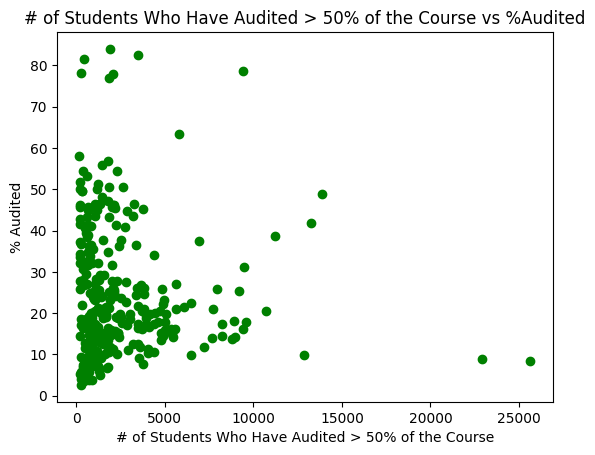

In [24]:
plt.scatter(x='Number_Students_Audited_Higher_50P_Content', y='Percentage_Audited', data=edx_students_metrics, color='green')
plt.title('# of Students Who Have Audited > 50% of the Course vs %Audited')
plt.xlabel('# of Students Who Have Audited > 50% of the Course')
plt.ylabel('% Audited')

### Distribution Plots

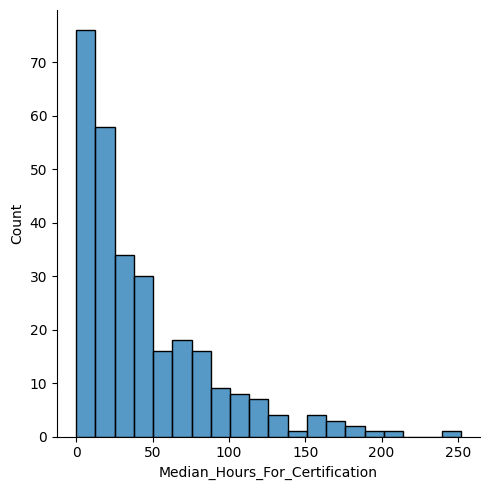

In [25]:
x = edx_students_metrics['Median_Hours_For_Certification']
sns.displot(x, bins=20)

<AxesSubplot: title={'center': 'Distribution of Median Hours For Certification'}, xlabel='Median_Hours_For_Certification', ylabel='Density'>

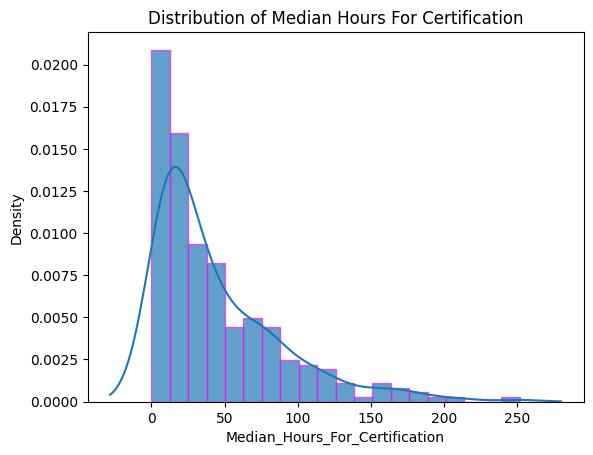

In [26]:
plt.title('Distribution of Median Hours For Certification')
sns.histplot(edx_students_metrics['Median_Hours_For_Certification'], kde=True, stat='density', kde_kws=dict(cut=2),
            alpha=.7, edgecolor = (1,0,1,.6), bins=20)

According to the plots above, it can be said that more courses have less than 100 hrs to reach certification.

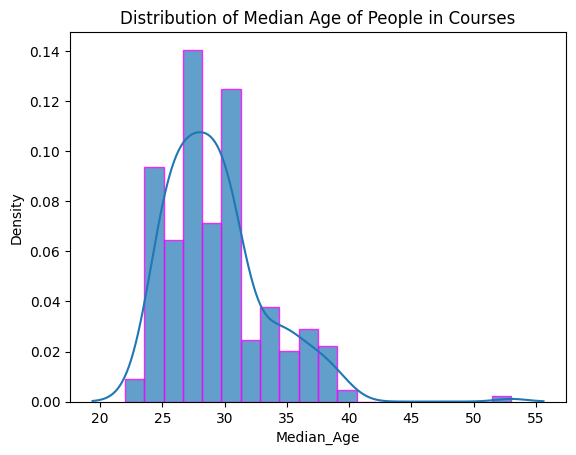

In [27]:
plt.title('Distribution of Median Age of People in Courses')
sns.histplot(edx_students_metrics['Median_Age'], kde=True, stat="density", kde_kws=dict(cut=2),
            alpha=.7, edgecolor=(1,0,1,.8), bins=20)
plt.show()

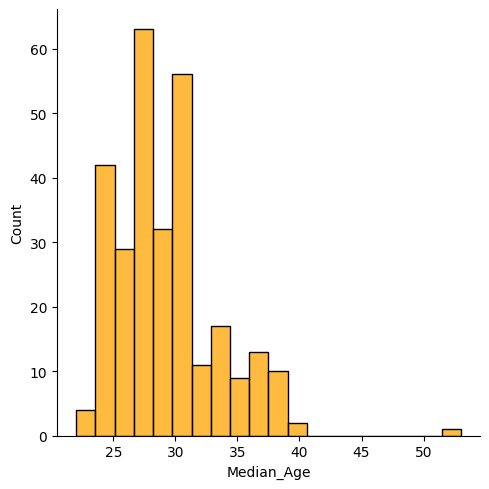

In [28]:
x = edx_students_metrics['Median_Age']
sns.displot(x, color='orange', bins=20)

From the plots above, it can be said that most people in courses are between 25-30 years old.

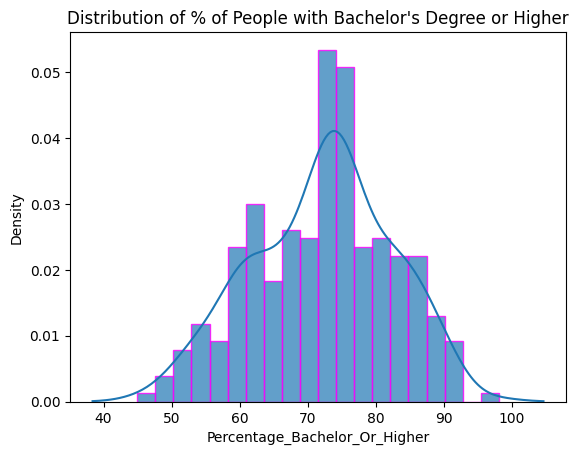

In [29]:
plt.title("Distribution of % of People with Bachelor's Degree or Higher")
sns.histplot(edx_students_metrics['Percentage_Bachelor_Or_Higher'], kde=True, stat="density", kde_kws=dict(cut=2),
            alpha=.7, edgecolor=(1,0,1,.8), bins=20)
plt.show()

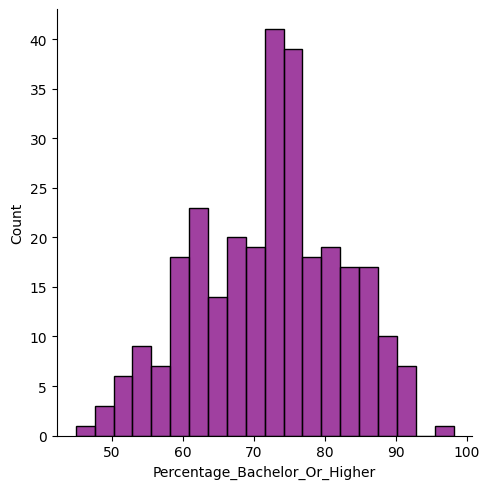

In [30]:
x = edx_students_metrics['Percentage_Bachelor_Or_Higher']
sns.displot(x, bins=20, color='purple')

It can be said that around 70-80% of the people who take edX courses have an academic education (bachelor's degree or higher).

### Correlation Test and Heat Map

The idea of conducting a correlation test helps us identify which variables have more impact on the desired outcomes of either completing a course or achieving a certificate.

In [31]:
edx_students_metrics.corr()

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/2073791140.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edx_students_metrics.corr()


Year  \
Year                                            1.000000   
Honor_Code_Certificates                        -0.371216   
Participants                                   -0.275028   
Number_Students_Audited_Higher_50P_Content     -0.310598   
Number_Students_Certified                      -0.505300   
Percentage_Audited                              0.245831   
Percentage_Certified                           -0.092178   
Percentage_Greater_50P_Course_Content_Accessed -0.432969   
Percentage_Posted_In_Forum                     -0.208171   
Percentage_Grade_Higher_Than_Zero              -0.322277   
Total_Course_Hours_k                           -0.327359   
Median_Hours_For_Certification                  0.020573   
Median_Age                                     -0.085625   
Percentage_Male                                -0.046774   
Percentage_Female                               0.046774   
Percentage_Bachelor_Or_Higher                   0.066525   

                                                Honor_Code_Certificates  \
Year                                                          -0.371216   
Honor_Code_Certificates                                        1.000000   
Participants                                                   0.132148   
Number_Students_Audited_Higher_50P_Content                     0.172172   
Number_Students_Certified                                      0.292400   
Percentage_Audited                                             0.045013   
Percentage_Certified                                           0.392686   
Percentage_Greater_50P_Course_Content_Accessed                 0.535052   
Percentage_Posted_In_Forum                                     0.044785   
Percentage_Grade_Higher_Than_Zero                              0.280544   
Total_Course_Hours_k                                           0.105779   
Median_Hours_For_Certification                                -0.025564   
Median_Age                                                    -0.007979   
Percentage_Male                                               -0.011557   
Percentage_Female                                              0.011557   
Percentage_Bachelor_Or_Higher                                 -0.019144   

                                                Participants  \
Year                                               -0.275028   
Honor_Code_Certificates                             0.132148   
Participants                                        1.000000   
Number_Students_Audited_Higher_50P_Content          0.854020   
Number_Students_Certified                           0.423183   
Percentage_Audited                                 -0.278157   
Percentage_Certified                               -0.167368   
Percentage_Greater_50P_Course_Content_Accessed     -0.003601   
Percentage_Posted_In_Forum                         -0.062613   
Percentage_Grade_Higher_Than_Zero                  -0.036733   
Total_Course_Hours_k                                0.560770   
Median_Hours_For_Certification                     -0.009575   
Median_Age                                         -0.124782   
Percentage_Male                                     0.155968   
Percentage_Female                                  -0.155968   
Percentage_Bachelor_Or_Higher                      -0.240486   

                                                Number_Students_Audited_Higher_50P_Content  \
Year                                                                             -0.310598   
Honor_Code_Certificates                                                           0.172172   
Participants                                                                      0.854020   
Number_Students_Audited_Higher_50P_Content                                        1.000000   
Number_Students_Certified                                                         0.666075   
Percentage_Audited                                                               -0.063784   
Percenta

A heat map helps to visualize relationships between variables.

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/3130476098.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edx_students_metrics.corr(), cmap='Spectral', annot=True)


<AxesSubplot: title={'center': "Correlation of Variables in edX Students' Metrics Dataset"}>

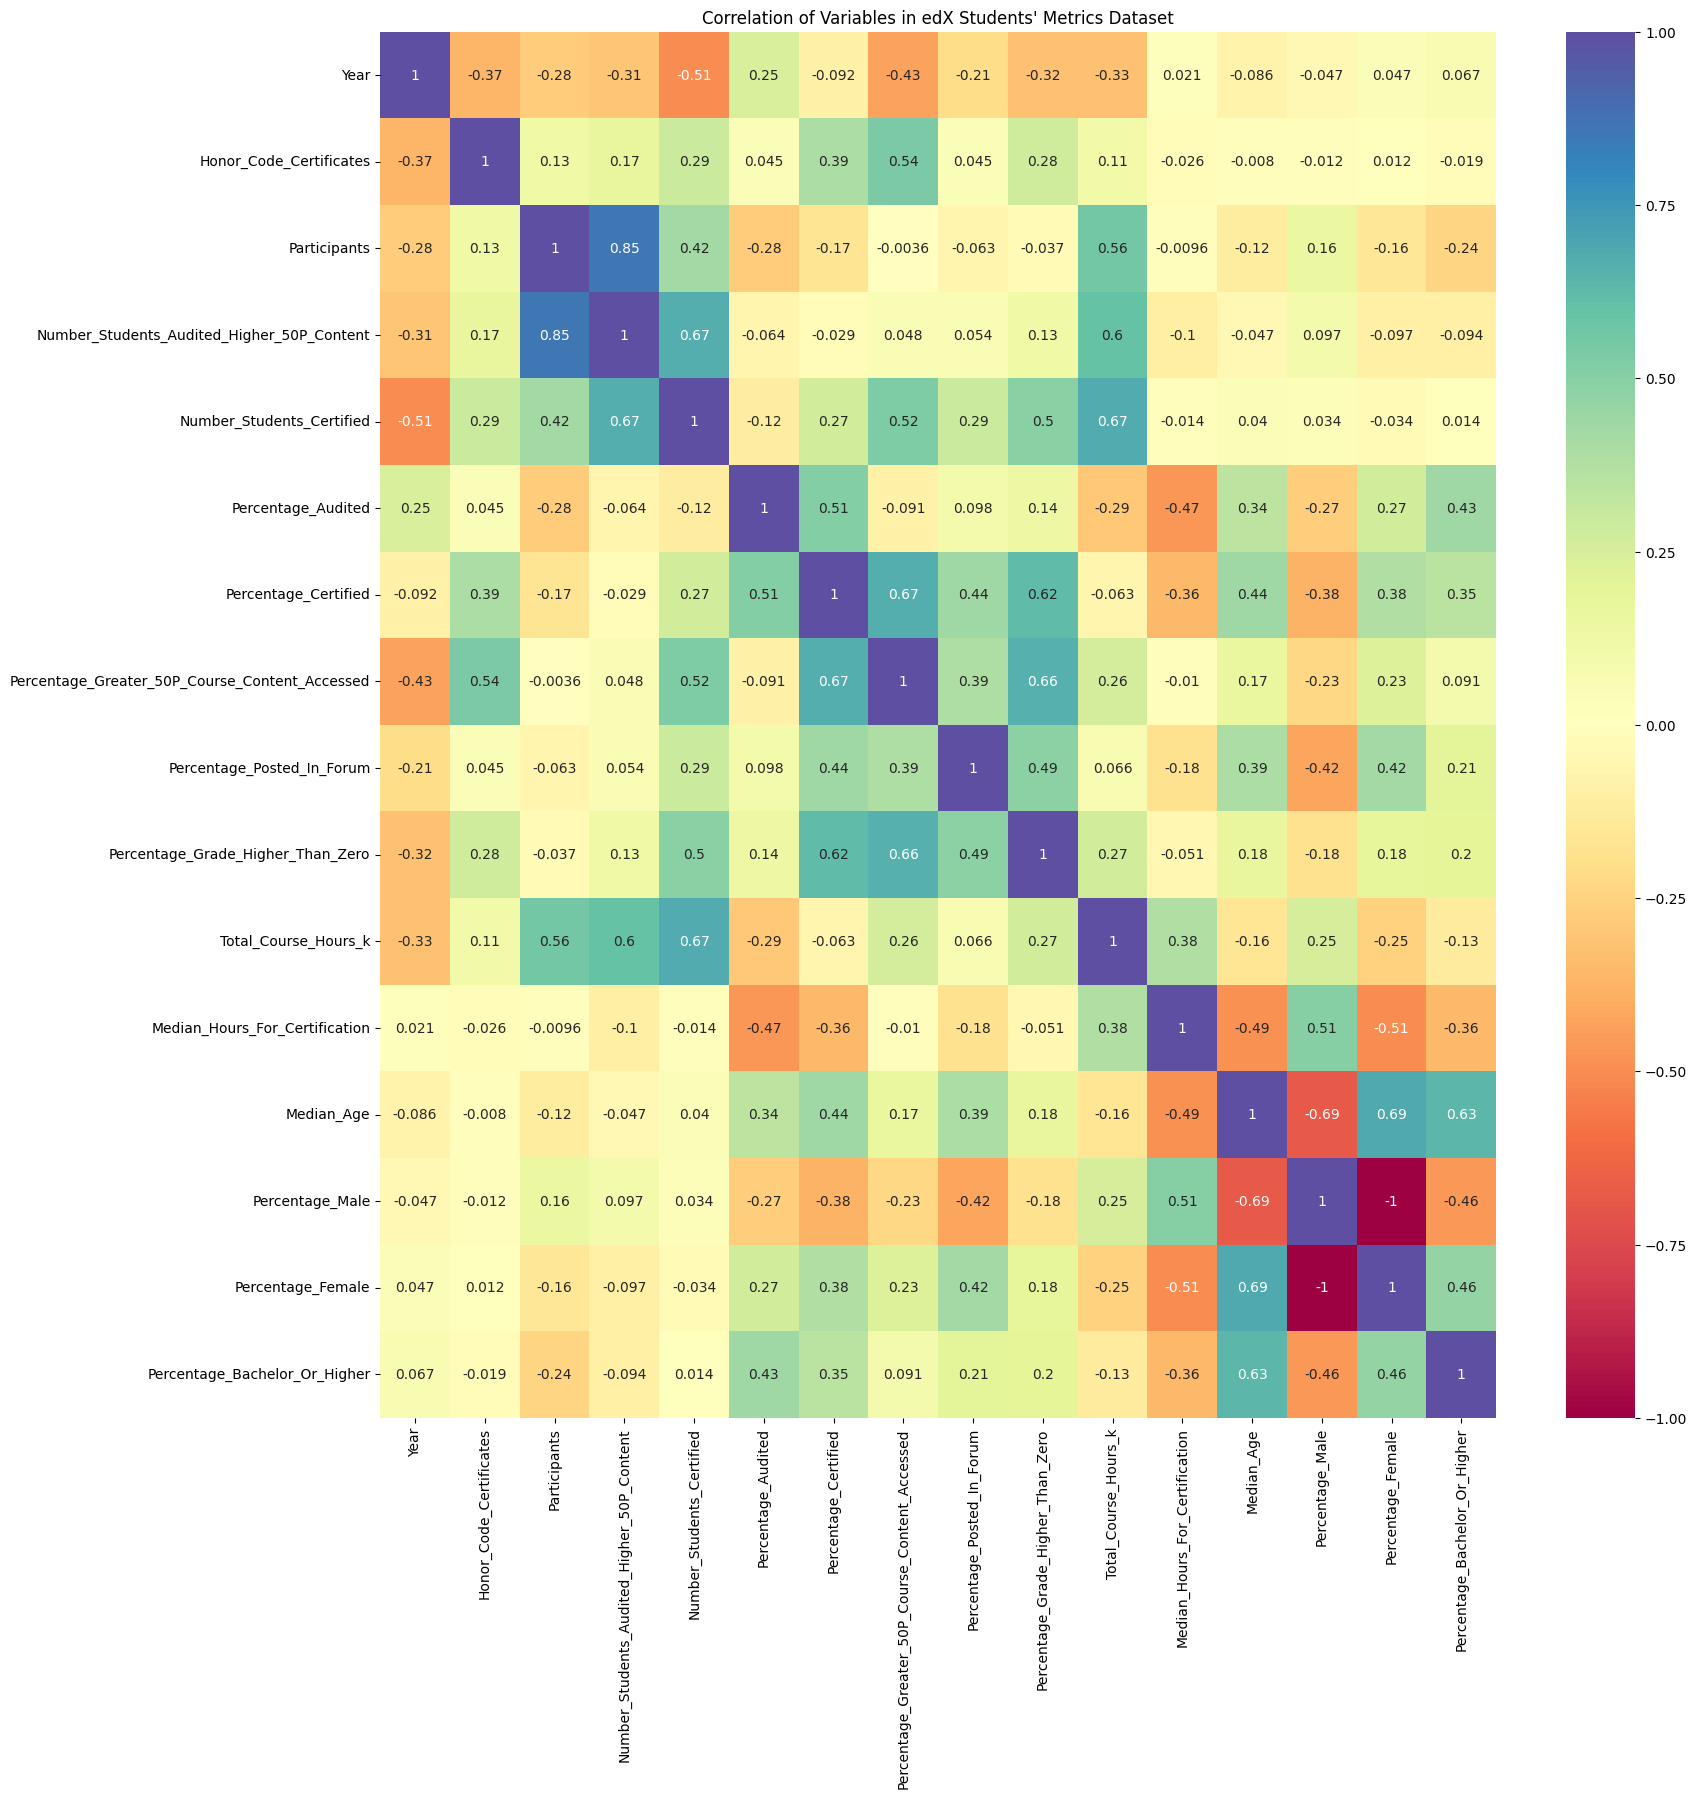

In [32]:
plt.figure(figsize=(18,18))
plt.title("Correlation of Variables in edX Students' Metrics Dataset")
sns.heatmap(edx_students_metrics.corr(), cmap='Spectral', annot=True)

### Analizing another dataset

`edx_platform.csv` was taken from https://www.kaggle.com/datasets/kanikanarang94/mooc-dataset. This dataset describes attributes of the content on the edX platform.

#### Loading the Dataset

In [33]:
!gdown 'https://drive.google.com/uc?id=1lL2OaH15WbeuHOTUGWV25gVMWTjqE8_X'

Downloading...
From: https://drive.google.com/uc?id=1lL2OaH15WbeuHOTUGWV25gVMWTjqE8_X
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Churn MOOC Prediction/edx_platform.csv
100%|██████████████████████████████████████| 58.7M/58.7M [00:01<00:00, 39.7MB/s]


In [34]:
edx_platform_path = working_dir+'/edx_platform.csv'
edx_platform = read_csv(edx_platform_path)

In [35]:
edx_platform.head(5)

Unnamed: 0 institute course_id  year semester       userid_DI  viewed  \
0           4  HarvardX    PH207x  2012     Fall  MHxPC130313697       0   
1           6  HarvardX    PH207x  2012     Fall  MHxPC130237753       1   
2           7  HarvardX     CS50x  2012   Summer  MHxPC130202970       1   
3          20  HarvardX     CS50x  2012   Summer  MHxPC130223941       1   
4          22  HarvardX    PH207x  2012     Fall  MHxPC130317399       0   

   explored  certified               final_cc_cname_DI  ... grade  \
0         0          0                           India  ...   0.0   
1         0          0                   United States  ...   0.0   
2         0          0                   United States  ...   0.0   
3         0          0  Other Middle East/Central Asia  ...   0.0   
4         0          0                       Australia  ...   0.0   

  start_time_DI  last_event_DI nevents ndays_act  nplay_video  nchapters  \
0    2012-07-24     2013-07-27       6         3       197757          0   
1    2012-07-24     2012-12-24     107         8            7          2   
2    2012-07-24     2013-03-28       8         1       197757          1   
3    2012-07-24     2013-07-15      25         2       197757          4   
4    2012-07-24     2012-08-25       3         2       197757          0   

   nforum_posts  incomplete_flag  age  
0             0                0   23  
1             0                0   19  
2             0                0   24  
3             0                0   20  
4             0                0   32  

[5 rows x 22 columns]

In [36]:
type(edx_platform)

pandas.core.frame.DataFrame

#### Handling Some Preprocessing Actions

In [37]:
del edx_platform['Unnamed: 0']

In [38]:
edx_platform.head(4)

institute course_id  year semester       userid_DI  viewed  explored  \
0  HarvardX    PH207x  2012     Fall  MHxPC130313697       0         0   
1  HarvardX    PH207x  2012     Fall  MHxPC130237753       1         0   
2  HarvardX     CS50x  2012   Summer  MHxPC130202970       1         0   
3  HarvardX     CS50x  2012   Summer  MHxPC130223941       1         0   

   certified               final_cc_cname_DI      LoE_DI  ... grade  \
0          0                           India  Bachelor's  ...   0.0   
1          0                   United States   Secondary  ...   0.0   
2          0                   United States  Bachelor's  ...   0.0   
3          0  Other Middle East/Central Asia   Secondary  ...   0.0   

   start_time_DI last_event_DI nevents  ndays_act  nplay_video  nchapters  \
0     2012-07-24    2013-07-27       6          3       197757          0   
1     2012-07-24    2012-12-24     107          8            7          2   
2     2012-07-24    2013-03-28       8          1       197757          1   
3     2012-07-24    2013-07-15      25          2       197757          4   

   nforum_posts  incomplete_flag  age  
0             0                0   23  
1             0                0   19  
2             0                0   24  
3             0                0   20  

[4 rows x 21 columns]

In [39]:
edx_platform.columns = ['Institute', 'Course_ID', 'Course_Year', 'Semester', 'User_ID', 'Viewed', 'Explored', 'Certified',
                       'Country', 'Ed_Level', 'Gender', 'Grade', 'Start_Date', 'Last_Activity_Date', 'N_Events',
                       'N_Active_Days', 'N_Played_Video', 'N_Chapters', 'N_Forum_Posts',
                        'Flagged_Incomplete', 'Age']

In [40]:
edx_platform.tail(5)

Institute Course_ID  Course_Year Semester         User_ID  Viewed  \
416916      MITx    6.002x         2013   Spring  MHxPC130030805       1   
416917      MITx     6.00x         2013   Spring  MHxPC130184108       1   
416918      MITx     6.00x         2013   Spring  MHxPC130359782       0   
416919      MITx    6.002x         2013   Spring  MHxPC130098513       0   
416920      MITx     6.00x         2013   Spring  MHxPC130098513       1   

        Explored  Certified        Country    Ed_Level  ... Grade  Start_Date  \
416916         0          0       Pakistan    Master's  ...   0.0  2013-09-07   
416917         0          0         Canada  Bachelor's  ...   0.0  2013-09-07   
416918         0          0   Other Europe  Bachelor's  ...   0.0  2013-09-07   
416919         0          0  United States   Doctorate  ...   0.0  2013-09-07   
416920         0          0  United States   Doctorate  ...   0.0  2013-09-07   

       Last_Activity_Date N_Events  N_Active_Days  N_Played_Video  N_Chapters  \
416916         2013-09-07       29              1          197757           1   
416917         2013-09-07       97              1               4           2   
416918         2013-09-07        1              1          197757           0   
416919         2013-09-07        1              1          197757           0   
416920         2013-09-07       74              1              14           1   

        N_Forum_Posts  Flagged_Incomplete  Age  
416916              0                   0   24  
416917              0                   0   22  
416918              0                   0   22  
416919              0                   0   34  
416920              0                   0   34  

[5 rows x 21 columns]

In [41]:
edx_platform.shape

(416921, 21)

In [42]:
edx_platform.isna().sum()

Institute                 0
Course_ID                 0
Course_Year               0
Semester                  0
User_ID                   0
Viewed                    0
Explored                  0
Certified                 0
Country                   0
Ed_Level                  0
Gender                23211
Grade                     0
Start_Date                0
Last_Activity_Date        0
N_Events                  0
N_Active_Days             0
N_Played_Video            0
N_Chapters                0
N_Forum_Posts             0
Flagged_Incomplete        0
Age                       0
dtype: int64

In [43]:
# THE PANDAS DROPNA METHOD DROPS RECORDS WITH MISSING DATA
# any: If how = 'any', dropna will drop the row if any of the values in that row are missing.
# all: If how = 'all', dropna will drop the row only if all of the values in that row are missing.
edx_platform.dropna(how='any', inplace=True)

In [44]:
edx_platform.isna().sum()

Institute             0
Course_ID             0
Course_Year           0
Semester              0
User_ID               0
Viewed                0
Explored              0
Certified             0
Country               0
Ed_Level              0
Gender                0
Grade                 0
Start_Date            0
Last_Activity_Date    0
N_Events              0
N_Active_Days         0
N_Played_Video        0
N_Chapters            0
N_Forum_Posts         0
Flagged_Incomplete    0
Age                   0
dtype: int64

In [45]:
edx_platform.shape

(393710, 21)

#### Analyzing the Correlation between Variables in the Dataset

In [46]:
edx_platform.describe()

Course_Year         Viewed       Explored      Certified  \
count  393710.000000  393710.000000  393710.000000  393710.000000   
mean     2012.561533       0.707092       0.077108       0.035732   
std         0.496200       0.455097       0.266762       0.185621   
min      2012.000000       0.000000       0.000000       0.000000   
25%      2012.000000       0.000000       0.000000       0.000000   
50%      2013.000000       1.000000       0.000000       0.000000   
75%      2013.000000       1.000000       0.000000       0.000000   
max      2013.000000       1.000000       1.000000       1.000000   

               Grade       N_Events  N_Active_Days  N_Played_Video  \
count  393710.000000  393710.000000  393710.000000   393710.000000   
mean        0.040314     374.690940       5.216936   121322.217307   
std         0.163789    1342.005924      10.780699    96254.867085   
min         0.000000       0.000000       0.000000        1.000000   
25%         0.000000       2.000000       1.000000       37.000000   
50%         0.000000      19.000000       2.000000   197757.000000   
75%         0.000000     134.000000       4.000000   197757.000000   
max         1.000000   53180.000000     205.000000   197757.000000   

          N_Chapters  N_Forum_Posts  Flagged_Incomplete            Age  
count  393710.000000  393710.000000       393710.000000  393710.000000  
mean        2.628325       0.017368            0.029189      27.025874  
std         4.261712       0.177836            0.168336       8.786009  
min         0.000000       0.000000            0.000000      -1.000000  
25%         0.000000       0.000000            0.000000      21.000000  
50%         1.000000       0.000000            0.000000      25.000000  
75%         3.000000       0.000000            0.000000      30.000000  
max        47.000000       6.000000            1.000000      82.000000

In [47]:
edx_platform.corr()

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/664083309.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  edx_platform.corr()


Course_Year    Viewed  Explored  Certified     Grade  \
Course_Year            1.000000  0.041251 -0.077772  -0.000349 -0.011917   
Viewed                 0.041251  1.000000  0.185975   0.123896  0.158412   
Explored              -0.077772  0.185975  1.000000   0.634580  0.699186   
Certified             -0.000349  0.123896  0.634580   1.000000  0.933381   
Grade                 -0.011917  0.158412  0.699186   0.933381  1.000000   
N_Events              -0.028654  0.178348  0.595685   0.636337  0.700222   
N_Active_Days         -0.028247  0.238291  0.676136   0.684964  0.746537   
N_Played_Video         0.023826 -0.510069 -0.132040  -0.135536 -0.180402   
N_Chapters             0.011106  0.392940  0.789199   0.625370  0.692101   
N_Forum_Posts          0.026776  0.061729  0.090469   0.090307  0.103204   
Flagged_Incomplete     0.140330 -0.112390 -0.050064  -0.033379 -0.042487   
Age                    0.072992 -0.003540  0.011908   0.000227 -0.001198   

                    N_Events  N_Active_Days  N_Played_Video  N_Chapters  \
Course_Year        -0.028654      -0.028247        0.023826    0.011106   
Viewed              0.178348       0.238291       -0.510069    0.392940   
Explored            0.595685       0.676136       -0.132040    0.789199   
Certified           0.636337       0.684964       -0.135536    0.625370   
Grade               0.700222       0.746537       -0.180402    0.692101   
N_Events            1.000000       0.843506       -0.290431    0.608066   
N_Active_Days       0.843506       1.000000       -0.286146    0.713727   
N_Played_Video     -0.290431      -0.286146        1.000000   -0.244125   
N_Chapters          0.608066       0.713727       -0.244125    1.000000   
N_Forum_Posts       0.121598       0.137566       -0.051318    0.135796   
Flagged_Incomplete -0.048413      -0.058935        0.084625   -0.090944   
Age                 0.011576       0.026786        0.021149    0.025241   

                    N_Forum_Posts  Flagged_Incomplete       Age  
Course_Year              0.026776            0.140330  0.072992  
Viewed                   0.061729           -0.112390 -0.003540  
Explored                 0.090469           -0.050064  0.011908  
Certified                0.090307           -0.033379  0.000227  
Grade                    0.103204           -0.042487 -0.001198  
N_Events                 0.121598           -0.048413  0.011576  
N_Active_Days            0.137566           -0.058935  0.026786  
N_Played_Video          -0.051318            0.084625  0.021149  
N_Chapters               0.135796           -0.090944  0.025241  
N_Forum_Posts            1.000000           -0.014050 -0.029207  
Flagged_Incomplete      -0.014050            1.000000 -0.012539  
Age                     -0.029207           -0.012539  1.000000

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/2658419247.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(edx_platform.corr(), cmap='BuPu', annot=True)


Text(0.5, 1.0, 'Correlation of Variables in edX Platform Dataset')

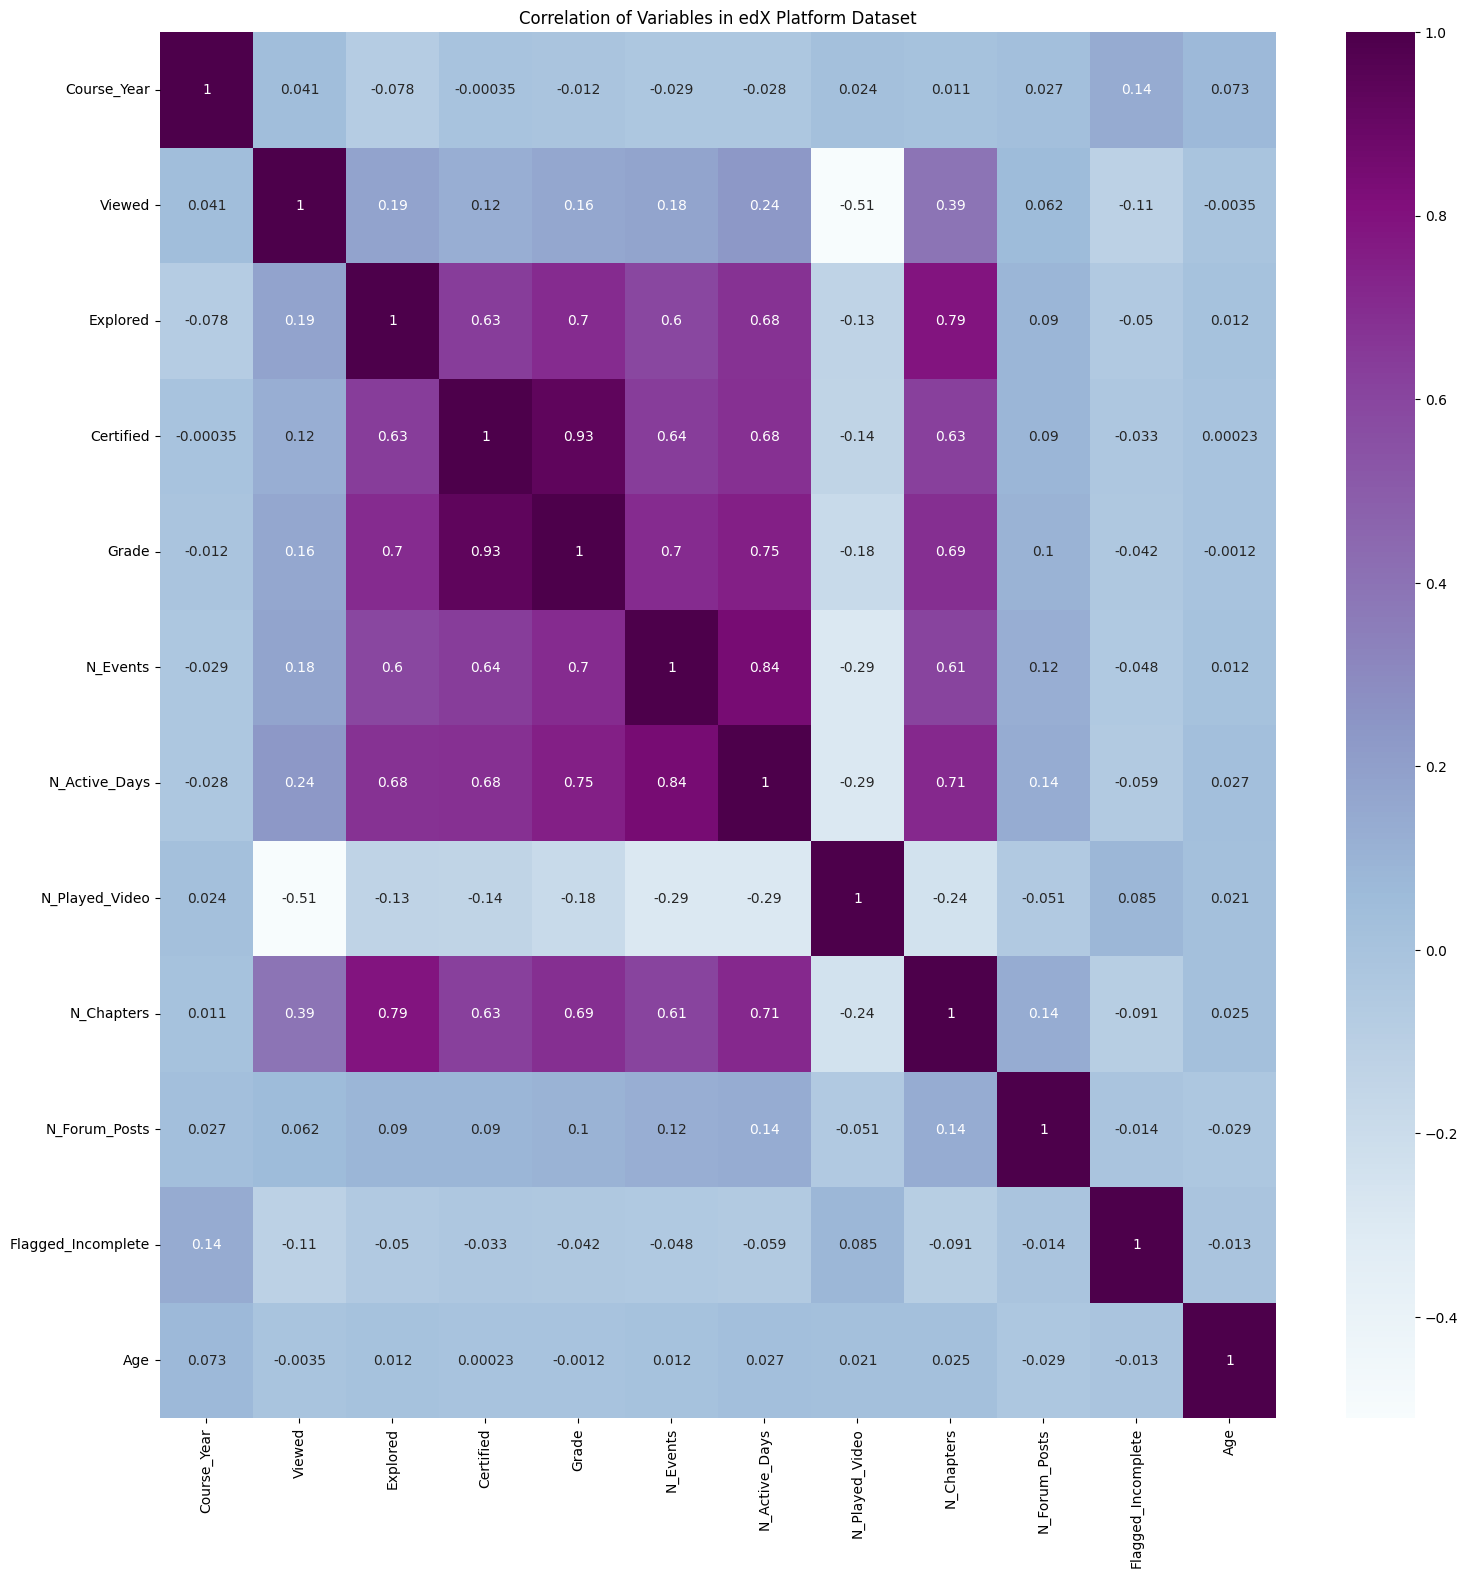

In [48]:
plt.figure(figsize=(18,18))
# sns.heatmap(edx_platform.corr(), cmap=sns.cubehelix_palette(as_cmap=True), annot=True)
# sns.heatmap(edx_platform.corr(), cmap='twilight_shifted', annot=True)
# sns.heatmap(edx_platform.corr(), cmap='crest', annot=True)
sns.heatmap(edx_platform.corr(), cmap='BuPu', annot=True)
plt.title('Correlation of Variables in edX Platform Dataset')

#### Distributions Plots

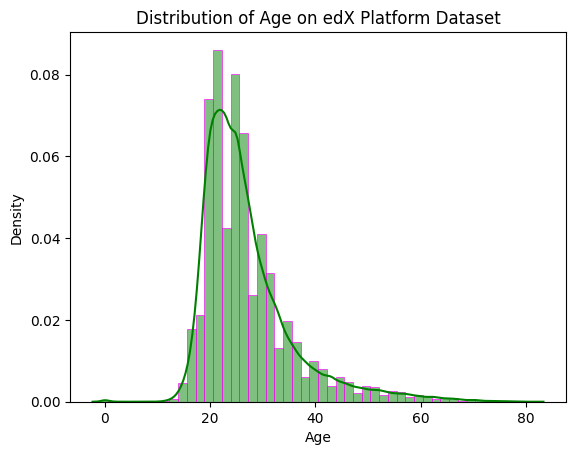

In [49]:
plt.title("Distribution of Age on edX Platform Dataset")
sns.histplot(edx_platform['Age'], kde=True, stat="density", kde_kws=dict(cut=2),
            alpha=.5, edgecolor=(1,0,1,.7), bins=50, color='green')
plt.show()

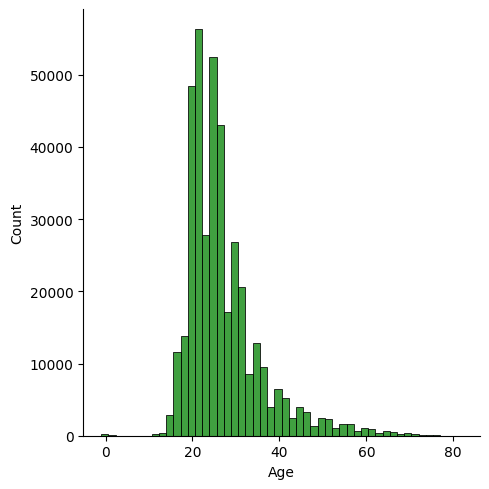

In [50]:
x = edx_platform['Age']
sns.displot(x, color='green', bins=50)

From the plot above, most people on edX platform are around 20-35 years old.

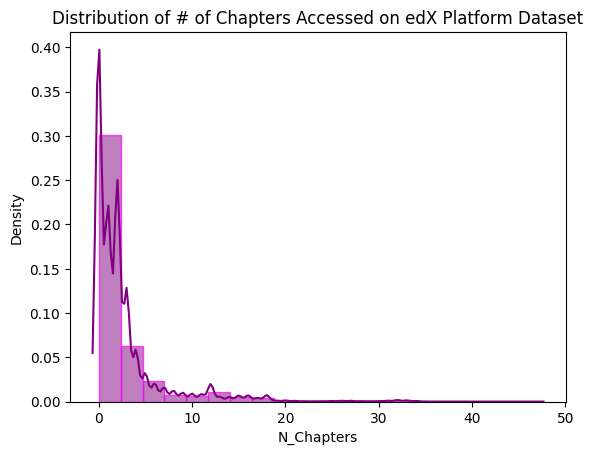

In [51]:
plt.title("Distribution of # of Chapters Accessed on edX Platform Dataset")
sns.histplot(edx_platform['N_Chapters'], kde=True, stat="density", kde_kws=dict(cut=2),
            alpha=.5, edgecolor=(1,0,1,.7), bins=20, color='purple')
plt.show()

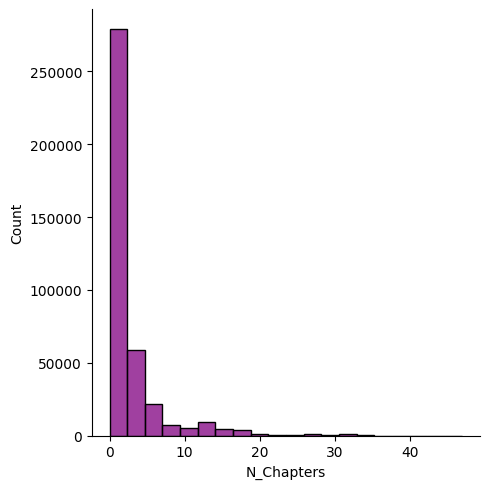

In [52]:
x = edx_platform['N_Chapters']
sns.displot(x, color='purple', bins=20)

It can be seen that most courses have fewer than 10 chapters accessed.

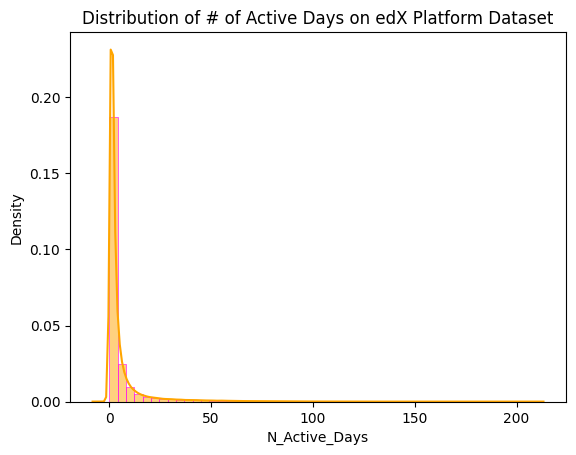

In [53]:
plt.title("Distribution of # of Active Days on edX Platform Dataset")
sns.histplot(edx_platform['N_Active_Days'], kde=True, stat="density", kde_kws=dict(cut=10),
            alpha=.5, edgecolor=(1,0,1,.7), bins=50, color='orange')
plt.show()

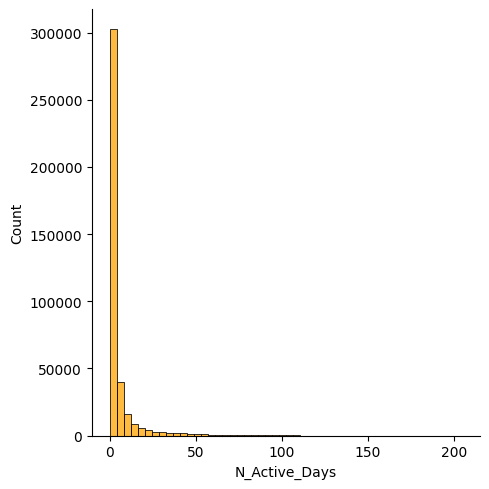

In [54]:
x = edx_platform['N_Active_Days']
sns.displot(x, color='orange', bins=50)

It can be seen that most users on edX platform are more active in the first 25 days.

### Udemy Web Development Dataset

`udemy_courses.csv` dataset was taken from https://www.kaggle.com/datasets/andrewmvd/udemy-courses?resource=download. This dataset contains 3.682 records of courses from 4 subjects (Business Finance, Graphic Design, Musical Instruments and Web Design) taken from Udemy.

In [55]:
# !pip uninstall -y pandasql

In [56]:
# !pip uninstall -y SQLAlchemy

In [57]:
!gdown 'https://drive.google.com/uc?id=1CA0LUyM0tPZVs2SXrrYj9CP5Y1bPkCkD'

Downloading...
From: https://drive.google.com/uc?id=1CA0LUyM0tPZVs2SXrrYj9CP5Y1bPkCkD
To: /Users/nathalia/Personal/code-practice/Data Science Projects/Churn MOOC Prediction/udemy_courses.csv
100%|████████████████████████████████████████| 694k/694k [00:00<00:00, 2.56MB/s]


In [58]:
udemy_courses_path = working_dir+'/udemy_courses.csv'
udemy_courses = read_csv(udemy_courses_path)

In [59]:
udemy_courses.head(5)

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration   published_timestamp           subject  
0               1.5  2017-01-18T20:58:58Z  Business Finance  
1              39.0  2017-03-09T16:34:20Z  Business Finance  
2               2.5  2016-12-19T19:26:30Z  Business Finance  
3               3.0  2017-05-30T20:07:24Z  Business Finance  
4               2.0  2016-12-13T14:57:18Z  Business Finance

#### Querying Data Corresponding to Web Development

In [60]:
# !pip install pandasql

In [61]:
# !pip install SQLAlchemy==1.4.46

In [62]:
import pandas as pd
from pandasql import sqldf

In [63]:
query = "SELECT * FROM udemy_courses WHERE subject LIKE '%Web%'"

In [64]:
web_development = sqldf(query, globals())

In [65]:
web_development.head(5)

course_id                                       course_title  \
0      28295  Learn Web Designing & HTML5/CSS3 Essentials in...   
1      19603  Learning Dynamic Website Design - PHP MySQL an...   
2     889438  ChatBots: Messenger ChatBot with API.AI and No...   
3     197836                                  Projects in HTML5   
4     505208  Programming Foundations: HTML5 + CSS3 for Entr...   

                                                 url  is_paid  price  \
0  https://www.udemy.com/build-beautiful-html5-we...        1     75   
1  https://www.udemy.com/learning-dynamic-website...        1     50   
2                    https://www.udemy.com/chatbots/        1     50   
3           https://www.udemy.com/projects-in-html5/        1     60   
4               https://www.udemy.com/html-css-more/        1     20   

   num_subscribers  num_reviews  num_lectures               level  \
0            43285          525            24          All Levels   
1            47886          285           125          All Levels   
2             2577          529            64          All Levels   
3             8777          206            75  Intermediate Level   
4            23764          490            58      Beginner Level   

   content_duration   published_timestamp          subject  
0               4.0  2013-01-03T00:55:31Z  Web Development  
1              12.5  2012-06-18T16:52:34Z  Web Development  
2               4.5  2016-06-30T16:57:08Z  Web Development  
3              15.5  2014-06-17T05:43:50Z  Web Development  
4               5.5  2015-10-17T04:52:25Z  Web Development

#### Data Preprocessing

In [66]:
del web_development['subject']

In [67]:
del web_development['course_id']

In [68]:
del web_development['url']

In [69]:
web_development.head(5)

course_title  is_paid  price  \
0  Learn Web Designing & HTML5/CSS3 Essentials in...        1     75   
1  Learning Dynamic Website Design - PHP MySQL an...        1     50   
2  ChatBots: Messenger ChatBot with API.AI and No...        1     50   
3                                  Projects in HTML5        1     60   
4  Programming Foundations: HTML5 + CSS3 for Entr...        1     20   

   num_subscribers  num_reviews  num_lectures               level  \
0            43285          525            24          All Levels   
1            47886          285           125          All Levels   
2             2577          529            64          All Levels   
3             8777          206            75  Intermediate Level   
4            23764          490            58      Beginner Level   

   content_duration   published_timestamp  
0               4.0  2013-01-03T00:55:31Z  
1              12.5  2012-06-18T16:52:34Z  
2               4.5  2016-06-30T16:57:08Z  
3              15.5  2014-06-17T05:43:50Z  
4               5.5  2015-10-17T04:52:25Z

In [70]:
web_development.isnull().sum()

course_title           0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
dtype: int64

In [71]:
web_development.columns = ['Course_Title', 'Is_Paid', 'Price', 'Num_Subscribers', 'Num_Reviews', 'Num_Lectures',
                          'Instructional_Level', 'Content_Duration', 'Published_Time']

In [72]:
web_development.head(3)

Course_Title  Is_Paid  Price  \
0  Learn Web Designing & HTML5/CSS3 Essentials in...        1     75   
1  Learning Dynamic Website Design - PHP MySQL an...        1     50   
2  ChatBots: Messenger ChatBot with API.AI and No...        1     50   

   Num_Subscribers  Num_Reviews  Num_Lectures Instructional_Level  \
0            43285          525            24          All Levels   
1            47886          285           125          All Levels   
2             2577          529            64          All Levels   

   Content_Duration        Published_Time  
0               4.0  2013-01-03T00:55:31Z  
1              12.5  2012-06-18T16:52:34Z  
2               4.5  2016-06-30T16:57:08Z

In [73]:
web_development['Published_Time'] = pd.to_datetime(web_development['Published_Time'])

In [74]:
web_development.head(3)

Course_Title  Is_Paid  Price  \
0  Learn Web Designing & HTML5/CSS3 Essentials in...        1     75   
1  Learning Dynamic Website Design - PHP MySQL an...        1     50   
2  ChatBots: Messenger ChatBot with API.AI and No...        1     50   

   Num_Subscribers  Num_Reviews  Num_Lectures Instructional_Level  \
0            43285          525            24          All Levels   
1            47886          285           125          All Levels   
2             2577          529            64          All Levels   

   Content_Duration            Published_Time  
0               4.0 2013-01-03 00:55:31+00:00  
1              12.5 2012-06-18 16:52:34+00:00  
2               4.5 2016-06-30 16:57:08+00:00

In [75]:
web_development.shape

(1200, 9)

In [76]:
web_development.dtypes

Course_Title                        object
Is_Paid                              int64
Price                                int64
Num_Subscribers                      int64
Num_Reviews                          int64
Num_Lectures                         int64
Instructional_Level                 object
Content_Duration                   float64
Published_Time         datetime64[ns, UTC]
dtype: object

#### Scatter Plots

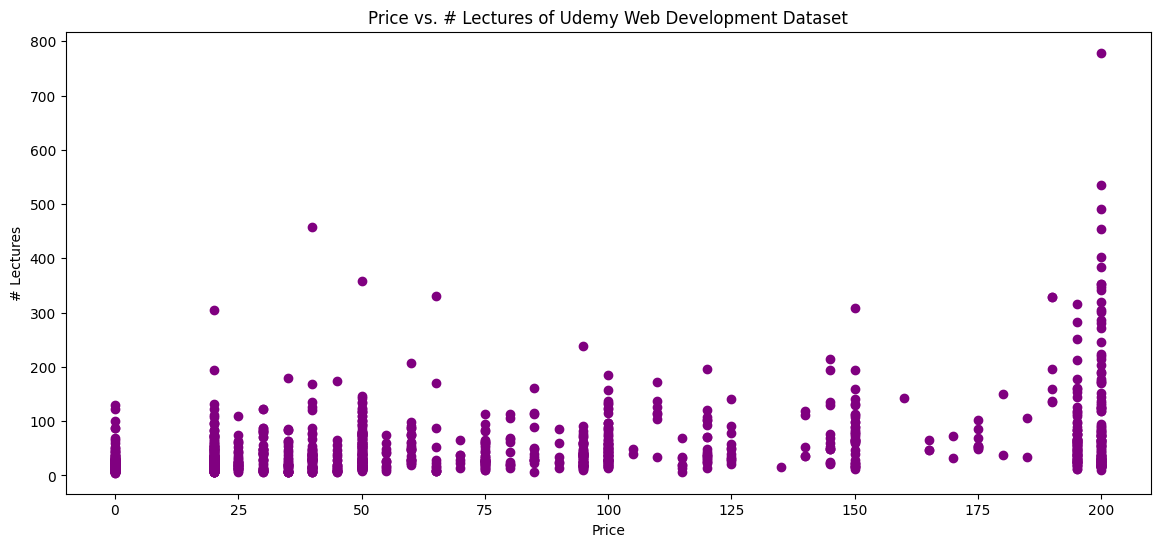

In [77]:
# Price=0, it's a free course
plt.figure(figsize=(14,6))
plt.scatter(x='Price', y='Num_Lectures', data=web_development, color='purple')
plt.title("Price vs. # Lectures of Udemy Web Development Dataset")
plt.xlabel('Price')
plt.ylabel('# Lectures')
plt.show()

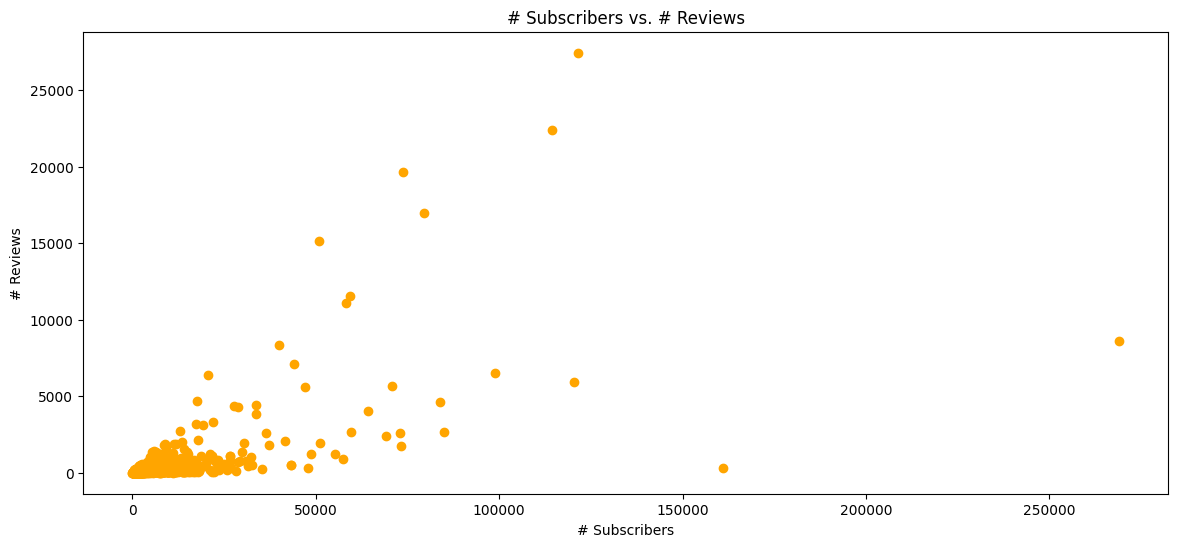

In [78]:
plt.figure(figsize=(14,6))
plt.scatter(x='Num_Subscribers', y='Num_Reviews', data=web_development, color='orange')
plt.title('# Subscribers vs. # Reviews')
plt.xlabel('# Subscribers')
plt.ylabel('# Reviews')
plt.show()

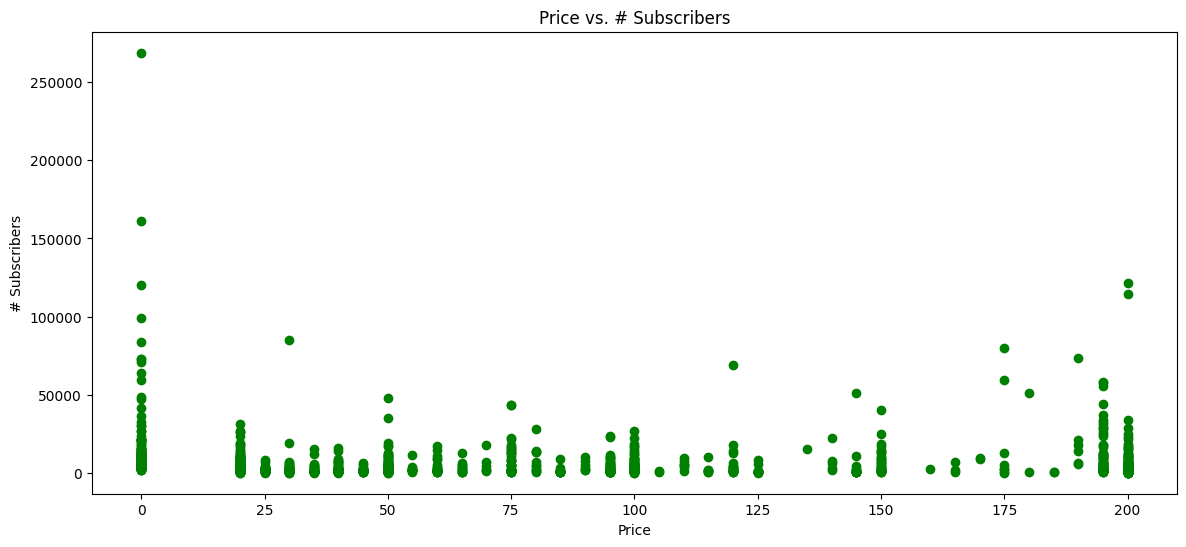

In [79]:
plt.figure(figsize=(14,6))
plt.scatter(x='Price', y='Num_Subscribers', data=web_development, color='green')
plt.title('Price vs. # Subscribers')
plt.xlabel('Price')
plt.ylabel('# Subscribers')
plt.show()

#### Distributions Plots

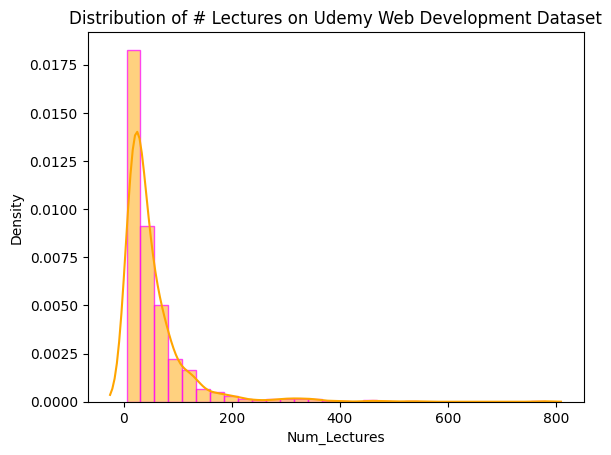

In [80]:
plt.title("Distribution of # Lectures on Udemy Web Development Dataset")
sns.histplot(web_development['Num_Lectures'], kde=True, stat="density", kde_kws=dict(cut=2),
            alpha=.5, edgecolor=(1,0,1,.7), bins=30, color='orange')
plt.show()

Text(0.5, 1.0, 'Distribution of # Lectures on Udemy Web Development Dataset')

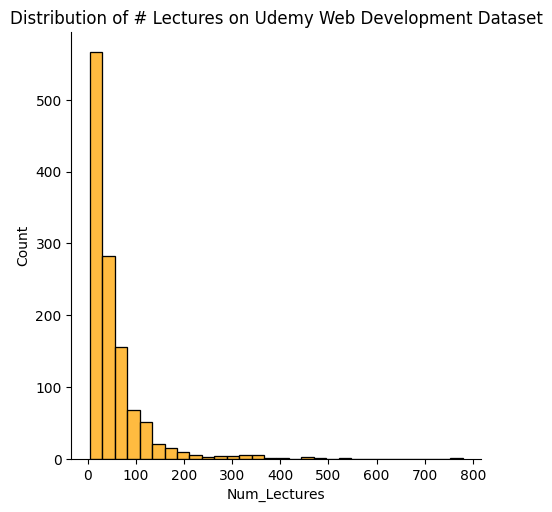

In [81]:
x = web_development['Num_Lectures']
sns.displot(x, color='orange', bins=30)
plt.title("Distribution of # Lectures on Udemy Web Development Dataset")

It can be seen that most Udemy web development courses have around 100 lectures.

#### Correlation between Variables

In [82]:
web_development.corr()

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/2427322710.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  web_development.corr()


Is_Paid     Price  Num_Subscribers  Num_Reviews  \
Is_Paid           1.000000  0.411747        -0.272265    -0.072246   
Price             0.411747  1.000000         0.013882     0.131607   
Num_Subscribers  -0.272265  0.013882         1.000000     0.643509   
Num_Reviews      -0.072246  0.131607         0.643509     1.000000   
Num_Lectures      0.161872  0.387237         0.126194     0.269064   
Content_Duration  0.147746  0.376142         0.148878     0.267287   

                  Num_Lectures  Content_Duration  
Is_Paid               0.161872          0.147746  
Price                 0.387237          0.376142  
Num_Subscribers       0.126194          0.148878  
Num_Reviews           0.269064          0.267287  
Num_Lectures          1.000000          0.859237  
Content_Duration      0.859237          1.000000

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/1145997540.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(web_development.corr(), cmap='twilight_shifted', annot=True)


Text(0.5, 1.0, 'Correlation of Variables in Udemy Web Development Dataset')

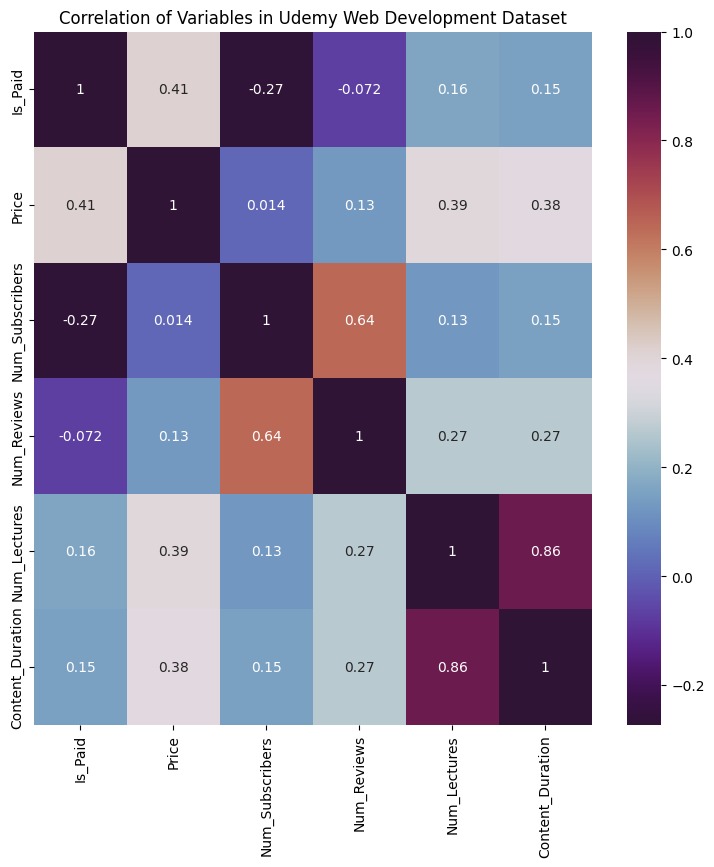

In [83]:
plt.figure(figsize=(9,9))
sns.heatmap(web_development.corr(), cmap='twilight_shifted', annot=True)
plt.title('Correlation of Variables in Udemy Web Development Dataset')

#### Encoding String Data into Numeric Form

`LabelEncoder()` encodec target labels with value between 0 and n_classes-1.

In [84]:
label_encoder = LabelEncoder()

In [85]:
web_development['Is_Paid'] = label_encoder.fit_transform(web_development['Is_Paid'])

In [86]:
web_development.tail(10)

Course_Title  Is_Paid  Price  \
1190                             A how to guide in HTML        0      0   
1191                  Building Better APIs with GraphQL        1     50   
1192  Learn Grunt with Examples: Automate Your Front...        1     20   
1193  Build A Stock Downloader With Visual Studio 20...        1     20   
1194    jQuery UI in Action: Build 5 jQuery UI Projects        1    150   
1195  Learn jQuery from Scratch - Master of JavaScri...        1    100   
1196  How To Design A WordPress Website With No Codi...        1     25   
1197                      Learn and Build using Polymer        1     40   
1198  CSS Animations: Create Amazing Effects on Your...        1     50   
1199  Using MODX CMS to Build Websites: A Beginner's...        1     45   

      Num_Subscribers  Num_Reviews  Num_Lectures Instructional_Level  \
1190             7318          205             8      Beginner Level   
1191              555           89            16          All Levels   
1192              496          113            17          All Levels   
1193              436           36            22  Intermediate Level   
1194              382           28           140          All Levels   
1195             1040           14            21          All Levels   
1196              306            3            42      Beginner Level   
1197              513          169            48          All Levels   
1198              300           31            38          All Levels   
1199              901           36            20      Beginner Level   

      Content_Duration            Published_Time  
1190          0.583333 2014-08-10 20:19:10+00:00  
1191          2.500000 2015-11-29 22:02:02+00:00  
1192          1.000000 2014-12-19 21:38:54+00:00  
1193          1.500000 2015-11-19 17:22:47+00:00  
1194         15.500000 2016-10-10 22:00:32+00:00  
1195          2.000000 2016-06-14 17:36:46+00:00  
1196          3.500000 2017-03-10 22:24:30+00:00  
1197          3.500000 2015-12-30 16:41:42+00:00  
1198          3.000000 2016-08-11 19:06:15+00:00  
1199          2.000000 2014-09-28 19:51:11+00:00

#### Datasets Overview

In [87]:
web_development.nunique()

Course_Title           1196
Is_Paid                   2
Price                    36
Num_Subscribers        1112
Num_Reviews             409
Num_Lectures            188
Instructional_Level       4
Content_Duration         83
Published_Time         1199
dtype: int64

In [88]:
edx_students_metrics.nunique()

Institution                                         2
Course_Number                                     188
Launch_Date                                       204
Title                                             201
Instructors                                       140
Course_Subject                                      4
Year                                                4
Honor_Code_Certificates                             2
Participants                                      288
Number_Students_Audited_Higher_50P_Content        278
Number_Students_Certified                         249
Percentage_Audited                                276
Percentage_Certified                              262
Percentage_Greater_50P_Course_Content_Accessed    280
Percentage_Played_Video                           281
Percentage_Posted_In_Forum                        249
Percentage_Grade_Higher_Than_Zero                 281
Total_Course_Hours_k                              285
Median_Hours_For_Certificati

In [89]:
edx_platform.nunique()

Institute                  2
Course_ID                 13
Course_Year                2
Semester                   3
User_ID               318323
Viewed                     2
Explored                   2
Certified                  2
Country                   34
Ed_Level                   5
Gender                     3
Grade                    101
Start_Date               411
Last_Activity_Date       404
N_Events                9480
N_Active_Days            152
N_Played_Video          2492
N_Chapters                48
N_Forum_Posts              7
Flagged_Incomplete         2
Age                       76
dtype: int64

In [90]:
edx_courses.nunique()

EDX_Title               972
Summary                 887
N_Enrolled              849
Course_Type               2
Institution_Provider    111
EDX_Instructors         775
Level                     3
EDX_Subject              31
Language                  9
Subtitles                33
Course_Effort            53
Course_Length            18
EDX_Price                47
Course_Description      932
Course_Syllabus         412
Course_URL              974
dtype: int64

In [91]:
web_development.head(5)

Course_Title  Is_Paid  Price  \
0  Learn Web Designing & HTML5/CSS3 Essentials in...        1     75   
1  Learning Dynamic Website Design - PHP MySQL an...        1     50   
2  ChatBots: Messenger ChatBot with API.AI and No...        1     50   
3                                  Projects in HTML5        1     60   
4  Programming Foundations: HTML5 + CSS3 for Entr...        1     20   

   Num_Subscribers  Num_Reviews  Num_Lectures Instructional_Level  \
0            43285          525            24          All Levels   
1            47886          285           125          All Levels   
2             2577          529            64          All Levels   
3             8777          206            75  Intermediate Level   
4            23764          490            58      Beginner Level   

   Content_Duration            Published_Time  
0               4.0 2013-01-03 00:55:31+00:00  
1              12.5 2012-06-18 16:52:34+00:00  
2               4.5 2016-06-30 16:57:08+00:00  
3              15.5 2014-06-17 05:43:50+00:00  
4               5.5 2015-10-17 04:52:25+00:00

In [92]:
edx_students_metrics.head(5)

Institution Course_Number Launch_Date  \
0        MITx        6.002x  2012-09-05   
1        MITx         6.00x  2012-09-26   
2        MITx        3.091x  2012-10-09   
3    HarvardX         CS50x  2012-10-15   
4    HarvardX        PH207x  2012-10-15   

                                               Title  \
0                           Circuits and Electronics   
1   Introduction to Computer Science and Programming   
2              Introduction to Solid State Chemistry   
3                   Introduction to Computer Science   
4  Health in Numbers: Quantitative Methods in Cli...   

                                         Instructors  \
0                                     Khurram Afridi   
1            Eric Grimson, John Guttag, Chris Terman   
2                                       Michael Cima   
3  David Malan, Nate Hardison, Rob Bowden, Tommy ...   
4                 Earl Francis Cook, Marcello Pagano   

                                      Course_Subject  Year  \
0  Science, Technology, Engineering, and Mathematics     1   
1                                   Computer Science     1   
2  Science, Technology, Engineering, and Mathematics     1   
3                                   Computer Science     1   
4             Government, Health, and Social Science     1   

   Honor_Code_Certificates  Participants  \
0                        1         36105   
1                        1         62709   
2                        1         16663   
3                        1        129400   
4                        1         52521   

   Number_Students_Audited_Higher_50P_Content  ...  \
0                                        5431  ...   
1                                        8949  ...   
2                                        2855  ...   
3                                       12888  ...   
4                                       10729  ...   

   Percentage_Greater_50P_Course_Content_Accessed  Percentage_Played_Video  \
0                                           54.98                     83.2   
1                                           64.05                    89.14   
2                                           72.85                    87.49   
3                                           11.11                        0   
4                                           47.12                    77.45   

   Percentage_Posted_In_Forum  Percentage_Grade_Higher_Than_Zero  \
0                        8.17                              28.97   
1                       14.38                              39.50   
2                       14.42                              34.89   
3                        0.00                               1.11   
4                       15.98                              32.52   

  Total_Course_Hours_k  Median_Hours_For_Certification  Median_Age  \
0               418.94                           64.45        26.0   
1               884.04                           78.53        28.0   
2               227.55                           61.28        27.0   
3               220.90                            0.00        28.0   
4               804.41                           76.10        32.0   

   Percentage_Male  Percentage_Female  Percentage_Bachelor_Or_Higher  
0            88.28              11.72                          60.68  
1            83.50              16.50                          63.04  
2            70.32              29.68                          58.76  
3            80.02              19.98                          58.78  
4            56.78              43.22                          88.33  

[5 rows x 23 columns]

In [93]:
edx_platform.head(5)

Institute Course_ID  Course_Year Semester         User_ID  Viewed  Explored  \
0  HarvardX    PH207x         2012     Fall  MHxPC130313697       0         0   
1  HarvardX    PH207x         2012     Fall  MHxPC130237753       1         0   
2  HarvardX     CS50x         2012   Summer  MHxPC130202970       1         0   
3  HarvardX     CS50x         2012   Summer  MHxPC130223941       1         0   
4  HarvardX    PH207x         2012     Fall  MHxPC130317399       0         0   

   Certified                         Country    Ed_Level  ... Grade  \
0          0                           India  Bachelor's  ...   0.0   
1          0                   United States   Secondary  ...   0.0   
2          0                   United States  Bachelor's  ...   0.0   
3          0  Other Middle East/Central Asia   Secondary  ...   0.0   
4          0                       Australia    Master's  ...   0.0   

   Start_Date Last_Activity_Date N_Events  N_Active_Days  N_Played_Video  \
0  2012-07-24         2013-07-27        6              3          197757   
1  2012-07-24         2012-12-24      107              8               7   
2  2012-07-24         2013-03-28        8              1          197757   
3  2012-07-24         2013-07-15       25              2          197757   
4  2012-07-24         2012-08-25        3              2          197757   

   N_Chapters  N_Forum_Posts  Flagged_Incomplete  Age  
0           0              0                   0   23  
1           2              0                   0   19  
2           1              0                   0   24  
3           4              0                   0   20  
4           0              0                   0   32  

[5 rows x 21 columns]

In [94]:
edx_courses.head(5)

EDX_Title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             Summary N_Enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   

                           Course_Type                   Institution_Provider  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

                                     EDX_Instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   

                    EDX_Subject Language Subtitles         Course_Effort  \
0  Education & Teacher Training  English   English    2–3 hours per week   
1              Computer Science  English   English    2–4 hours per week   
2              Computer Science  English   English   6–18 hours per week   
3    Data Analysis & Statistics  English   English  10–15 hours per week   
4              Computer Science  English   English    5–7 hours per week   

  Course_Length                                     EDX_Price  \
0       2 Weeks   FREE-Add a Verified Certificate for $49 USD   
1       7 Weeks   FREE-Add a Verified Certificate for $49 USD   
2      12 Weeks   FREE-Add a Verified Certificate for $90 USD   
3      13 Weeks  FREE-Add a Verified Certificate for $199 USD   
4       4 Weeks  FREE-Add a Verified Certificate for $249 USD   

                                  Course_Description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   
3  In the last decade, the amount of data availab...   
4  Begin your journey in a new career in marketin...   

                                     Course_Syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          Course_URL  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...  
3      https://www.edx.org/course/the-analytics-edge  
4  https://www.edx.org/course/marketing-analytics...

In [95]:
web_development.shape

(1200, 9)

In [96]:
edx_students_metrics.shape

(289, 23)

In [97]:
edx_platform.shape

(393710, 21)

In [98]:
edx_courses.shape

(975, 16)

In [99]:
web_development.columns

Index(['Course_Title', 'Is_Paid', 'Price', 'Num_Subscribers', 'Num_Reviews',
       'Num_Lectures', 'Instructional_Level', 'Content_Duration',
       'Published_Time'],
      dtype='object')

In [100]:
edx_students_metrics.columns

Index(['Institution', 'Course_Number', 'Launch_Date', 'Title', 'Instructors',
       'Course_Subject', 'Year', 'Honor_Code_Certificates', 'Participants',
       'Number_Students_Audited_Higher_50P_Content',
       'Number_Students_Certified', 'Percentage_Audited',
       'Percentage_Certified',
       'Percentage_Greater_50P_Course_Content_Accessed',
       'Percentage_Played_Video', 'Percentage_Posted_In_Forum',
       'Percentage_Grade_Higher_Than_Zero', 'Total_Course_Hours_k',
       'Median_Hours_For_Certification', 'Median_Age', 'Percentage_Male',
       'Percentage_Female', 'Percentage_Bachelor_Or_Higher'],
      dtype='object')

In [101]:
edx_platform.columns

Index(['Institute', 'Course_ID', 'Course_Year', 'Semester', 'User_ID',
       'Viewed', 'Explored', 'Certified', 'Country', 'Ed_Level', 'Gender',
       'Grade', 'Start_Date', 'Last_Activity_Date', 'N_Events',
       'N_Active_Days', 'N_Played_Video', 'N_Chapters', 'N_Forum_Posts',
       'Flagged_Incomplete', 'Age'],
      dtype='object')

In [102]:
edx_courses.columns

Index(['EDX_Title', 'Summary', 'N_Enrolled', 'Course_Type',
       'Institution_Provider', 'EDX_Instructors', 'Level', 'EDX_Subject',
       'Language', 'Subtitles', 'Course_Effort', 'Course_Length', 'EDX_Price',
       'Course_Description', 'Course_Syllabus', 'Course_URL'],
      dtype='object')

### Creating a New Dataset Based on All-Mentioned Dataset

In [103]:
huge_mooc_dataset = pd.concat([edx_courses, edx_students_metrics, edx_platform, web_development])

In [104]:
huge_mooc_dataset.isna().sum()

EDX_Title               395199
Summary                 395252
N_Enrolled              395319
Course_Type             395199
Institution_Provider    395199
                         ...  
Num_Reviews             394974
Num_Lectures            394974
Instructional_Level     394974
Content_Duration        394974
Published_Time          394974
Length: 69, dtype: int64

`.fillna(0)` method is used to fill column (one or multiple columns) contains NA/NaN/None with 0.

In [105]:
huge_mooc_dataset = pd.concat([edx_courses, edx_students_metrics, edx_platform, web_development]).fillna(0)

In [106]:
huge_mooc_dataset.isna().sum()

EDX_Title               0
Summary                 0
N_Enrolled              0
Course_Type             0
Institution_Provider    0
                       ..
Num_Reviews             0
Num_Lectures            0
Instructional_Level     0
Content_Duration        0
Published_Time          0
Length: 69, dtype: int64

In [107]:
huge_mooc_dataset.head(10)

EDX_Title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   
5                 Introduction to Project Management   
6                      Leading High-Performing Teams   
7               The Foundations of Happiness at Work   
8  Managing Study, Stress and Mental Health at Un...   
9                      Six Sigma: Define and Measure   

                                             Summary N_Enrolled  \
0  Learn essential strategies for successful onli...    124,980   
1  This course is a "no prerequisite" introductio...    293,864   
2  An introduction to the intellectual enterprise...  2,442,271   
3  Through inspiring examples and stories, discov...    129,555   
4     This course is part of a MicroMasters® Program     81,140   
5  Learn the principles of project management and...    301,793   
6  Learn how to motivate, engage and empower peop...     32,847   
7  Learn why happiness at work matters and how to...     67,073   
8  Develop a clearer understanding of what mental...     23,061   
9  An introduction to the Six Sigma methodology a...     92,411   

                           Course_Type                   Institution_Provider  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   
5              Self-paced on your time                 University of Adelaide   
6              Self-paced on your time           The University of Queensland   
7              Self-paced on your time     University of California, Berkeley   
8              Self-paced on your time                      Curtin University   
9              Self-paced on your time         Technische Universität München   

                                     EDX_Instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   
5  Frank Schultmann-Noel Lindsay-Anton Jordaan-Jo...  Introductory   
6                                   Tyler G. Okimoto  Intermediate   
7               Dacher Keltner-Emiliana Simon-Thomas  Introductory   
8  Ben Milbourn-Craig Thompson-Sonya Girdler-Fran...  Introductory   
9                            Martin Grunow-Holly Ott  Introductory   

                    EDX_Subject Language Subtitles  ...  Age Course_Title  \
0  Education & Teacher Training  English   English  ...  0.0            0   
1              Computer Science  English   English  ...  0.0            0   
2              Computer Science  English   English  ...  0.0            0   
3    Data Analysis & Statistics  English   English  ...  0.0            0   
4              Computer Science  English   English  ...  0.0            0   
5         Business & Management  English   English  ...  0.0            0   
6                 Communication  English   English  ...  0.0            0   
7         Business & Management  English   English  ...  0.0            0   
8               Health & Safety  English   English  ...  0.0            0   
9         Business & Management  English   English  ...  0.0            0   

  Is_Paid Price Num_Subscribers Num_Reviews Num_Lectures Instructional_Level  \
0     0.0   0.0             0.0         0.0          0.0                   0   
1     0.0   0.0  

In [108]:
huge_mooc_dataset.shape

(396174, 69)

In [109]:
huge_mooc_dataset.columns

Index(['EDX_Title', 'Summary', 'N_Enrolled', 'Course_Type',
       'Institution_Provider', 'EDX_Instructors', 'Level', 'EDX_Subject',
       'Language', 'Subtitles', 'Course_Effort', 'Course_Length', 'EDX_Price',
       'Course_Description', 'Course_Syllabus', 'Course_URL', 'Institution',
       'Course_Number', 'Launch_Date', 'Title', 'Instructors',
       'Course_Subject', 'Year', 'Honor_Code_Certificates', 'Participants',
       'Number_Students_Audited_Higher_50P_Content',
       'Number_Students_Certified', 'Percentage_Audited',
       'Percentage_Certified',
       'Percentage_Greater_50P_Course_Content_Accessed',
       'Percentage_Played_Video', 'Percentage_Posted_In_Forum',
       'Percentage_Grade_Higher_Than_Zero', 'Total_Course_Hours_k',
       'Median_Hours_For_Certification', 'Median_Age', 'Percentage_Male',
       'Percentage_Female', 'Percentage_Bachelor_Or_Higher', 'Institute',
       'Course_ID', 'Course_Year', 'Semester', 'User_ID', 'Viewed', 'Explored',
       'Cert

In [110]:
huge_mooc_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396174 entries, 0 to 1199
Data columns (total 69 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   EDX_Title                                       396174 non-null  object 
 1   Summary                                         396174 non-null  object 
 2   N_Enrolled                                      396174 non-null  object 
 3   Course_Type                                     396174 non-null  object 
 4   Institution_Provider                            396174 non-null  object 
 5   EDX_Instructors                                 396174 non-null  object 
 6   Level                                           396174 non-null  object 
 7   EDX_Subject                                     396174 non-null  object 
 8   Language                                        396174 non-null  object 
 9   Subtitles                   

#### Correlation Information

In [111]:
huge_mooc_dataset.corr()

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/1219828264.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  huge_mooc_dataset.corr()


Year  \
Year                                            1.000000   
Honor_Code_Certificates                         0.822929   
Participants                                    0.399948   
Number_Students_Audited_Higher_50P_Content      0.545439   
Number_Students_Certified                       0.473727   
Percentage_Audited                              0.848084   
Percentage_Certified                            0.700917   
Percentage_Greater_50P_Course_Content_Accessed  0.752762   
Percentage_Posted_In_Forum                      0.715302   
Percentage_Grade_Higher_Than_Zero               0.767377   
Total_Course_Hours_k                            0.420847   
Median_Hours_For_Certification                  0.688680   
Median_Age                                      0.949376   
Percentage_Male                                 0.932783   
Percentage_Female                               0.872561   
Percentage_Bachelor_Or_Higher                   0.954679   
Course_Year                                    -0.328398   
Viewed                                         -0.039941   
Explored                                       -0.007484   
Certified                                      -0.004985   
Grade                                          -0.006373   
N_Events                                       -0.007229   
N_Active_Days                                  -0.012524   
N_Played_Video                                 -0.032483   
N_Chapters                                     -0.015954   
N_Forum_Posts                                  -0.002529   
Flagged_Incomplete                             -0.004490   
Age                                            -0.077420   
Is_Paid                                        -0.001350   
Price                                          -0.001086   
Num_Subscribers                                -0.000593   
Num_Reviews                                    -0.000317   
Num_Lectures                                   -0.000921   
Content_Duration                               -0.000874   

                                                Honor_Code_Certificates  \
Year                                                           0.822929   
Honor_Code_Certificates                                        1.000000   
Participants                                                   0.486988   
Number_Students_Audited_Higher_50P_Content                     0.630697   
Number_Students_Certified                                      0.648067   
Percentage_Audited                                             0.771796   
Percentage_Certified                                           0.786064   
Percentage_Greater_50P_Course_Content_Accessed                 0.887428   
Percentage_Posted_In_Forum                                     0.716346   
Percentage_Grade_Higher_Than_Zero                              0.828213   
Total_Course_Hours_k                                           0.505914   
Median_Hours_For_Certification                                 0.634327   
Median_Age                                                     0.892809   
Percentage_Male                                                0.876336   
Percentage_Female                                              0.815193   
Percentage_Bachelor_Or_Higher                                  0.891700   
Course_Year                                                   -0.307954   
Viewed                                                        -0.037454   
Explored                                                      -0.007018   
Certified                                                     -0.004675   
Grade                                                         -0.005977   
N_Events                                                      -0.006779   
N_Active_Days                                                 -0.011744   
N_Played_Video                                                -0.030461   
N_Chapters                                                    -0.014961   
N

/var/folders/fk/fbj1ksls7wq3z6dyxsdrrz9w0000gn/T/ipykernel_1887/3568431319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(huge_mooc_dataset.corr(), cmap='crest', annot=False)


Text(0.5, 1.0, 'Correlation of All Variables in Datasets')

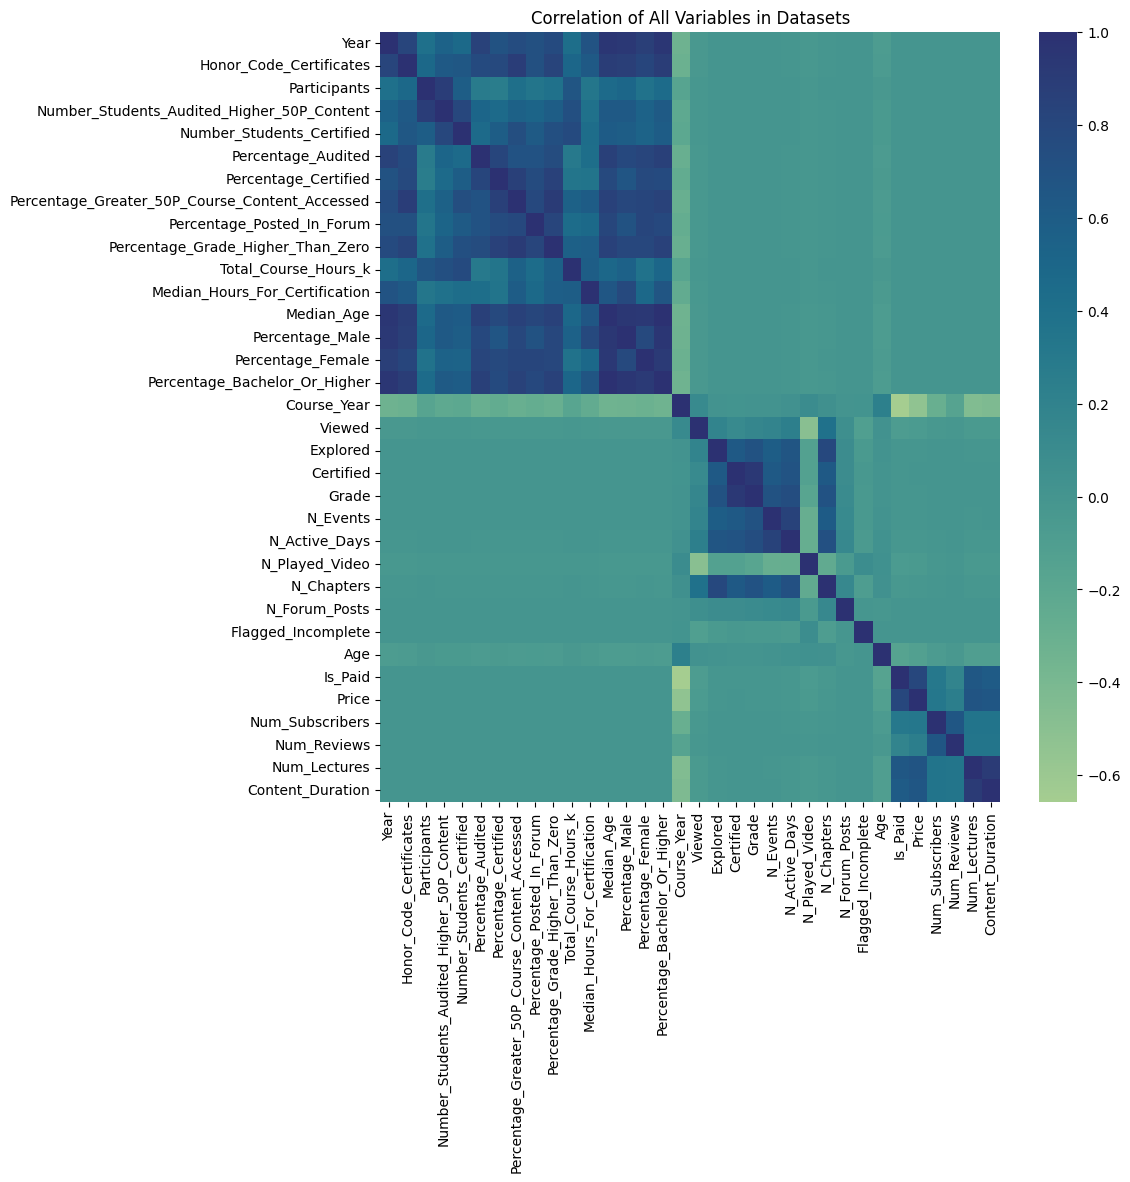

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(huge_mooc_dataset.corr(), cmap='crest', annot=False)
plt.title('Correlation of All Variables in Datasets')

#### Scatter Plots

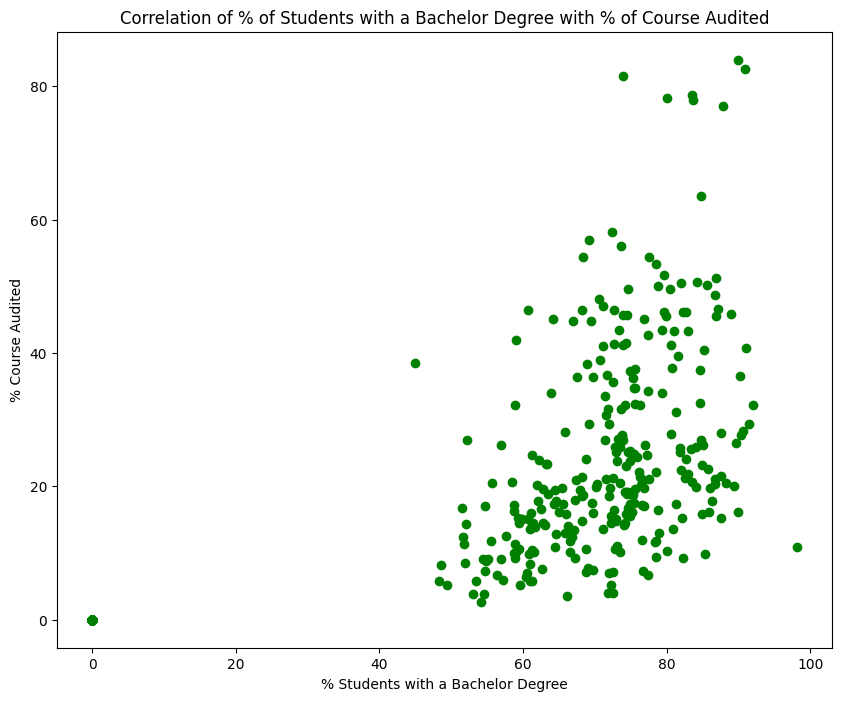

In [113]:
plt.figure(figsize=(10,8))
plt.scatter(x='Percentage_Bachelor_Or_Higher', y='Percentage_Audited', data=huge_mooc_dataset, color='green')
plt.title('Correlation of % of Students with a Bachelor Degree with % of Course Audited')
plt.xlabel('% Students with a Bachelor Degree')
plt.ylabel('% Course Audited')
plt.show()

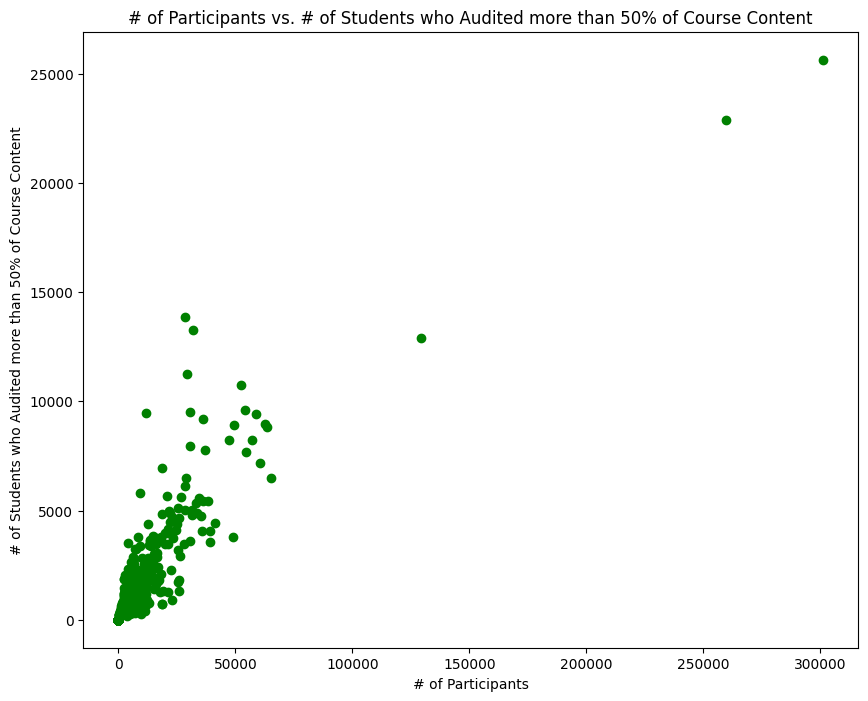

In [114]:
plt.figure(figsize=(10,8))
plt.scatter(x='Participants', y='Number_Students_Audited_Higher_50P_Content', data=huge_mooc_dataset, color='green')
plt.title('# of Participants vs. # of Students who Audited more than 50% of Course Content')
plt.xlabel('# of Participants')
plt.ylabel('# of Students who Audited more than 50% of Course Content')
plt.show()

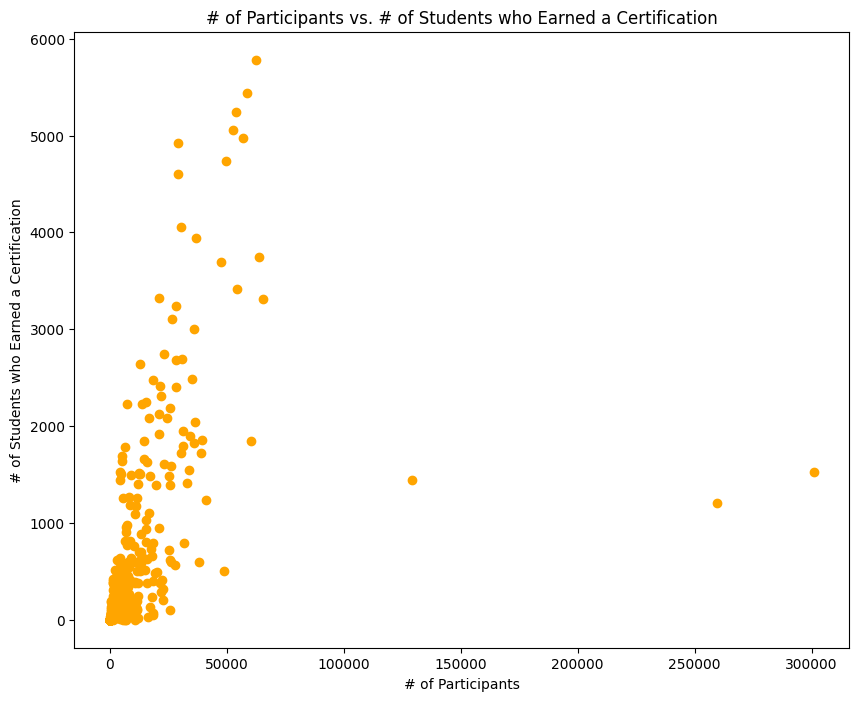

In [115]:
plt.figure(figsize=(10,8))
plt.scatter(x='Participants', y='Number_Students_Certified', data=huge_mooc_dataset, color='orange')
plt.title('# of Participants vs. # of Students who Earned a Certification')
plt.xlabel('# of Participants')
plt.ylabel('# of Students who Earned a Certification')
plt.show()

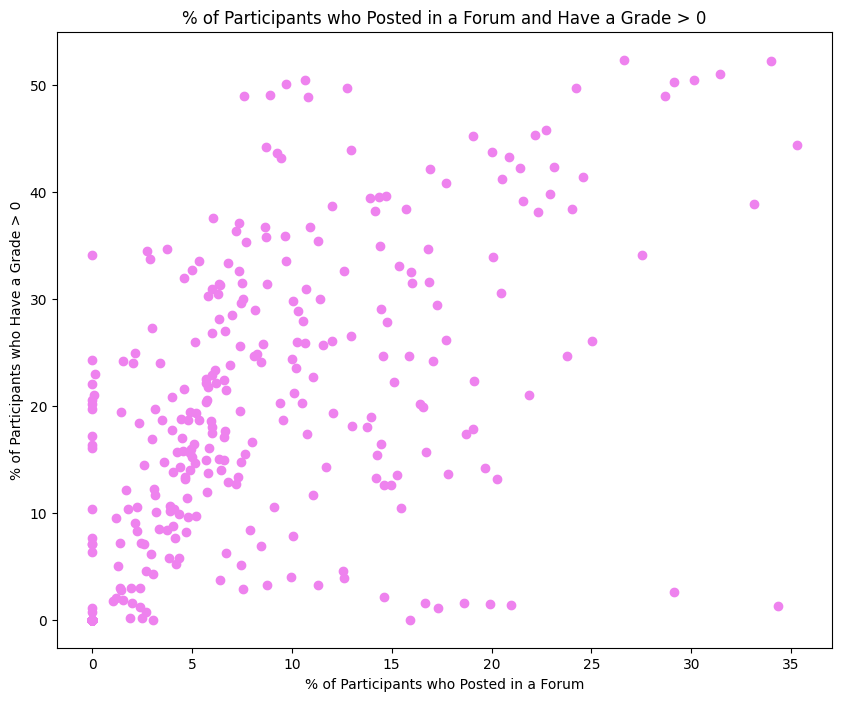

In [116]:
plt.figure(figsize=(10,8))
plt.scatter(x='Percentage_Posted_In_Forum', y='Percentage_Grade_Higher_Than_Zero', data=huge_mooc_dataset, color='violet')
plt.title('% of Participants who Posted in a Forum and Have a Grade > 0')
plt.xlabel('% of Participants who Posted in a Forum')
plt.ylabel('% of Participants who Have a Grade > 0')
plt.show()

In [117]:
plt.figure(figsize=(10,8))
plt.scatter(x='N_Active_Days', y='N_Chapters', data=huge_mooc_dataset, color='purple')
plt.title('# of Active Days vs. # of Chapters Accessed')
plt.xlabel('# of Active Days')
plt.ylabel('# of Chapters Accessed')
plt.show()

In [118]:
plt.figure(figsize=(10,8))
plt.scatter(x='Total_Course_Hours_k', y='Number_Students_Certified', data=huge_mooc_dataset, color='brown')
plt.title('Total Course Hours vs. # of Students who Earned a Certification')
plt.xlabel('Total Course Hours')
plt.ylabel('# of Students who Earned a Certification')
plt.show()

In [119]:
huge_mooc_dataset.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396174 entries, 0 to 1199
Data columns (total 69 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   EDX_Title                                       396174 non-null  object 
 1   Summary                                         396174 non-null  object 
 2   N_Enrolled                                      396174 non-null  object 
 3   Course_Type                                     396174 non-null  object 
 4   Institution_Provider                            396174 non-null  object 
 5   EDX_Instructors                                 396174 non-null  object 
 6   Level                                           396174 non-null  object 
 7   EDX_Subject                                     396174 non-null  object 
 8   Language                                        396174 non-null  object 
 9   Subtitles                   

#### Creating a Subdataset because to Logistic Regression Works only with Numeric Variables

In [120]:
huge_mooc_num = huge_mooc_dataset[['Year', 'Honor_Code_Certificates', 'Participants', 
                                   'Number_Students_Audited_Higher_50P_Content', 'Number_Students_Certified',
                                   'Percentage_Audited', 'Percentage_Certified', 
                                   'Percentage_Greater_50P_Course_Content_Accessed', 'Percentage_Posted_In_Forum',
                                   'Percentage_Grade_Higher_Than_Zero', 'Total_Course_Hours_k', 
                                   'Median_Hours_For_Certification', 'Median_Age', 'Percentage_Male', 
                                   'Percentage_Female', 'Percentage_Bachelor_Or_Higher', 'Course_Year', 'Viewed',
                                   'Explored', 'Certified', 'Grade', 'N_Events', 'N_Active_Days', 'N_Played_Video',
                                   'N_Chapters', 'N_Forum_Posts', 'Flagged_Incomplete', 'Age', 'Is_Paid', 'Price',
                                   'Num_Subscribers', 'Num_Reviews', 'Num_Lectures', 'Content_Duration']]

In [121]:
huge_mooc_num.shape

(396174, 34)

In [122]:
plt.figure(figsize=(30,30))
sns.heatmap(huge_mooc_num.corr(), cmap='viridis', annot=True)
plt.title('Correlation of All Numeric Variables in Datasets')
plt.show()

In [123]:
huge_mooc_num_subset = huge_mooc_num[['Percentage_Male', 'Percentage_Female', 'Median_Hours_For_Certification',
                                'Total_Course_Hours_k', 'Percentage_Greater_50P_Course_Content_Accessed',
                                'Honor_Code_Certificates', 'Percentage_Audited','Percentage_Certified', 
                                'Percentage_Posted_In_Forum', 'Percentage_Bachelor_Or_Higher',
                                'Num_Subscribers', 'Num_Reviews', 'Percentage_Grade_Higher_Than_Zero', 
                                'Participants', 'Number_Students_Audited_Higher_50P_Content',
                                'N_Chapters', 'N_Events']]

In [124]:
huge_mooc_num_subset.shape

(396174, 17)

In [125]:
huge_mooc_num_subset.dtypes

Percentage_Male                                   float64
Percentage_Female                                 float64
Median_Hours_For_Certification                    float64
Total_Course_Hours_k                              float64
Percentage_Greater_50P_Course_Content_Accessed    float64
Honor_Code_Certificates                           float64
Percentage_Audited                                float64
Percentage_Certified                              float64
Percentage_Posted_In_Forum                        float64
Percentage_Bachelor_Or_Higher                     float64
Num_Subscribers                                   float64
Num_Reviews                                       float64
Percentage_Grade_Higher_Than_Zero                 float64
Participants                                      float64
Number_Students_Audited_Higher_50P_Content        float64
N_Chapters                                        float64
N_Events                                          float64
dtype: object

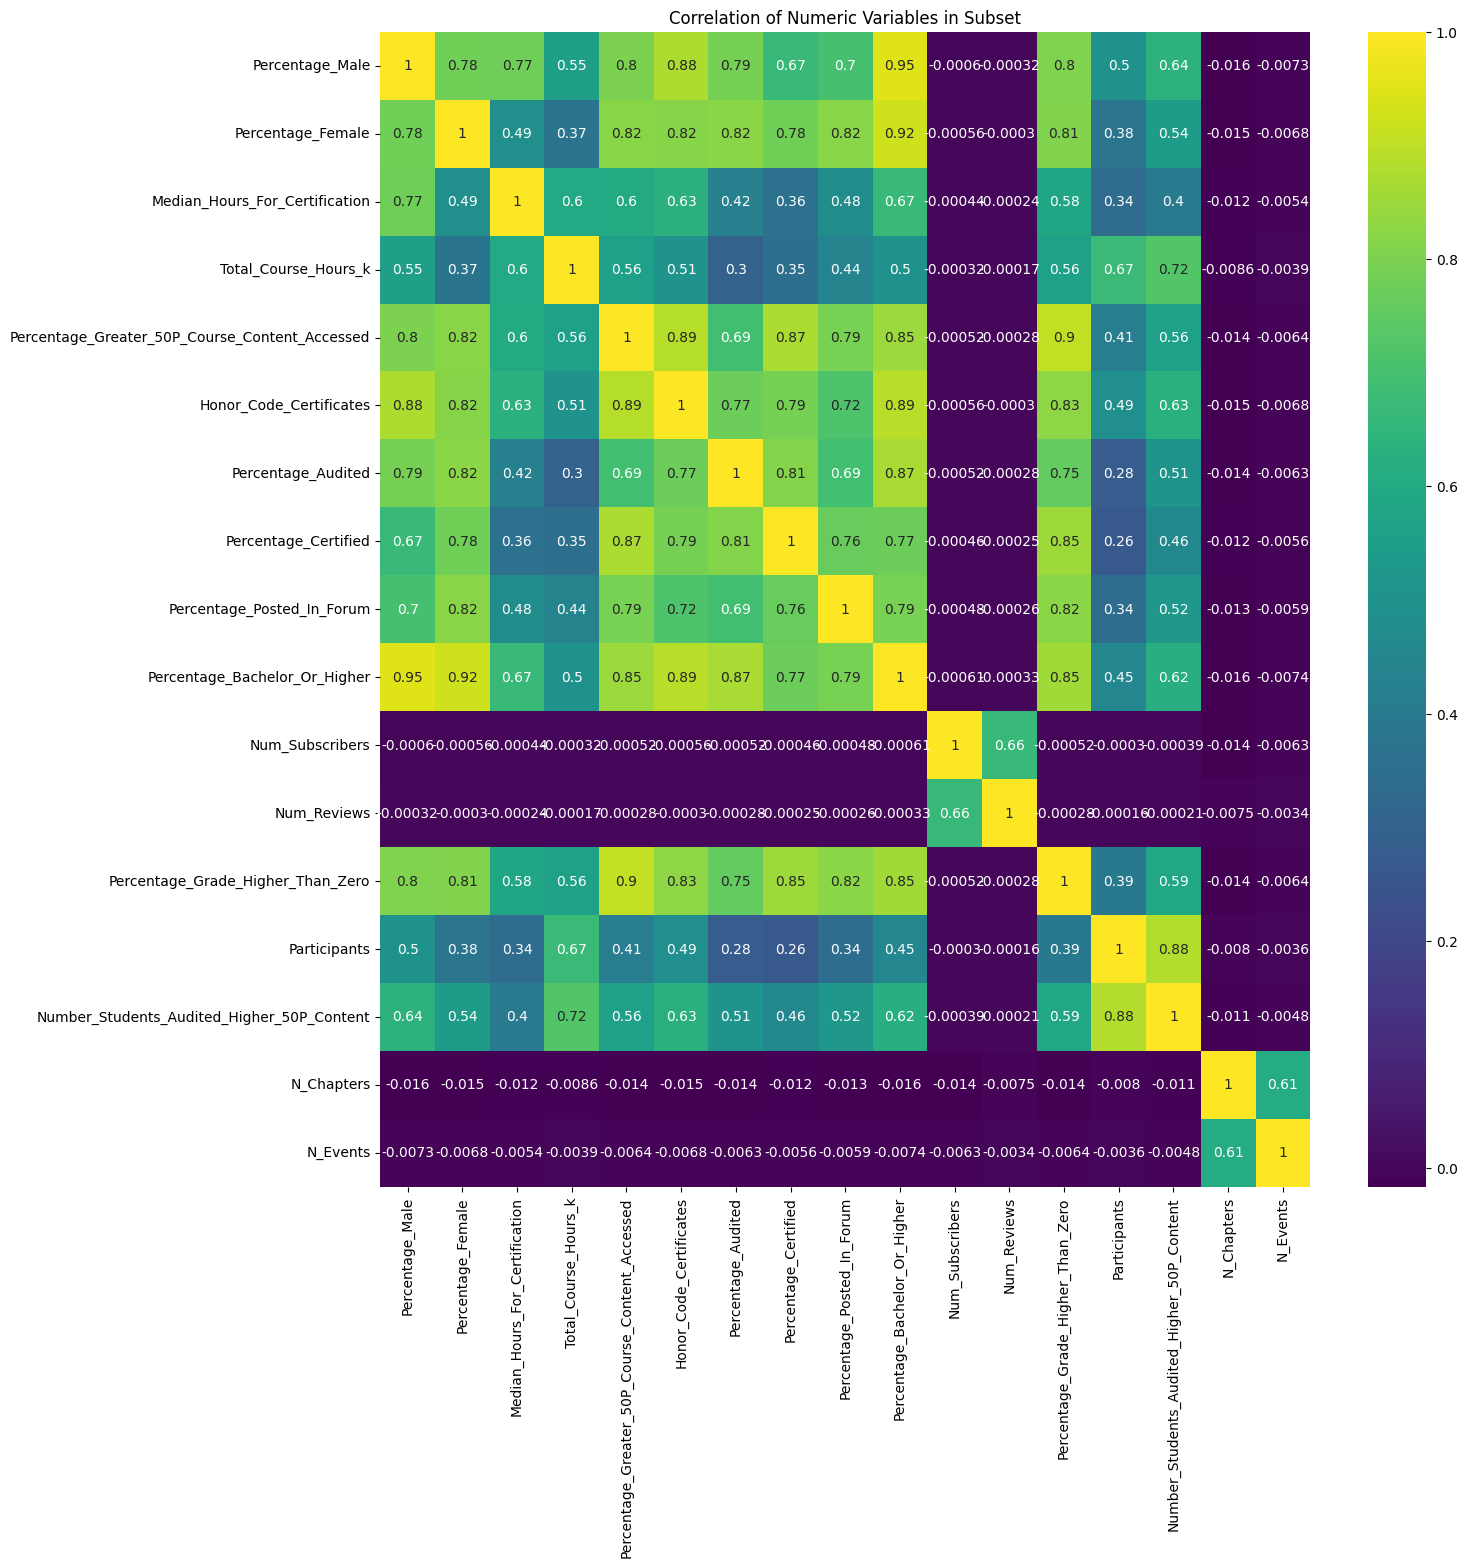

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(huge_mooc_num_subset.corr(), cmap='viridis', annot=True)
plt.title('Correlation of Numeric Variables in Subset')
plt.show()

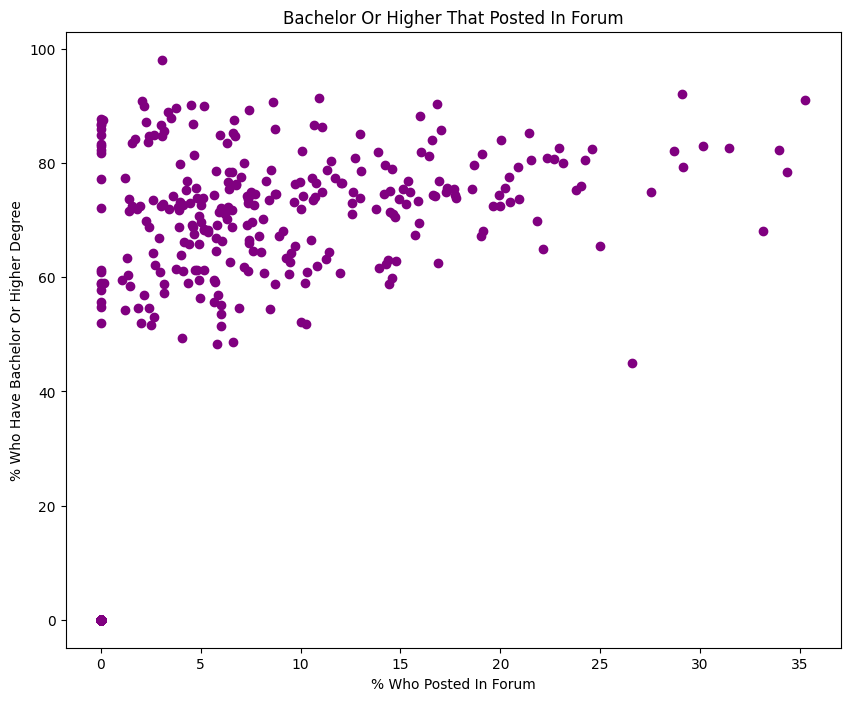

In [127]:
plt.figure(figsize=(10,8))
plt.scatter(x='Percentage_Posted_In_Forum', y='Percentage_Bachelor_Or_Higher', data=huge_mooc_num, color='purple')
plt.title('Bachelor Or Higher That Posted In Forum')
plt.xlabel('% Who Posted In Forum')
plt.ylabel('% Who Have Bachelor Or Higher Degree')
plt.show()

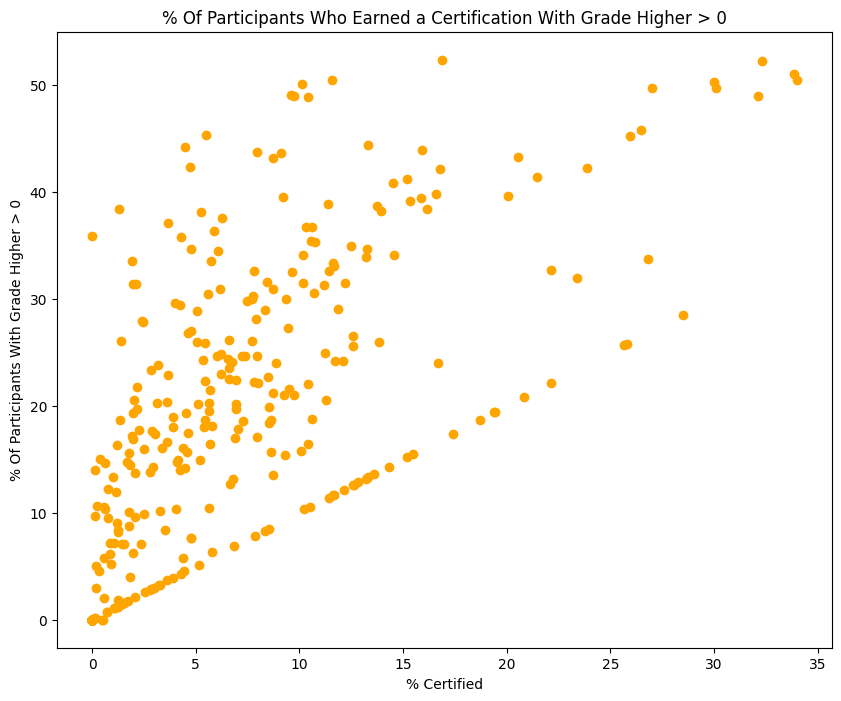

In [128]:
plt.figure(figsize=(10,8))
plt.scatter(x='Percentage_Certified', y='Percentage_Grade_Higher_Than_Zero', data=huge_mooc_num, color='orange')
plt.title('% Of Participants Who Earned a Certification With Grade Higher > 0')
plt.xlabel('% Certified')
plt.ylabel('% Of Participants With Grade Higher > 0')
plt.show()

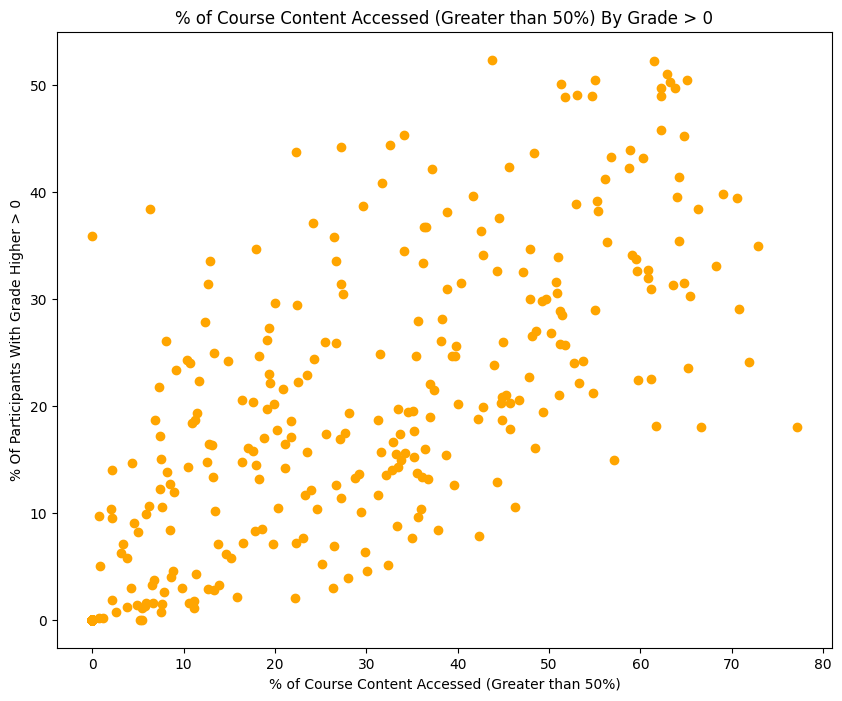

In [129]:
plt.figure(figsize=(10,8))
plt.scatter(x='Percentage_Greater_50P_Course_Content_Accessed', y='Percentage_Grade_Higher_Than_Zero', data=huge_mooc_num, color='orange')
plt.title('% of Course Content Accessed (Greater than 50%) By Grade > 0')
plt.xlabel('% of Course Content Accessed (Greater than 50%)')
plt.ylabel('% Of Participants With Grade Higher > 0')
plt.show()

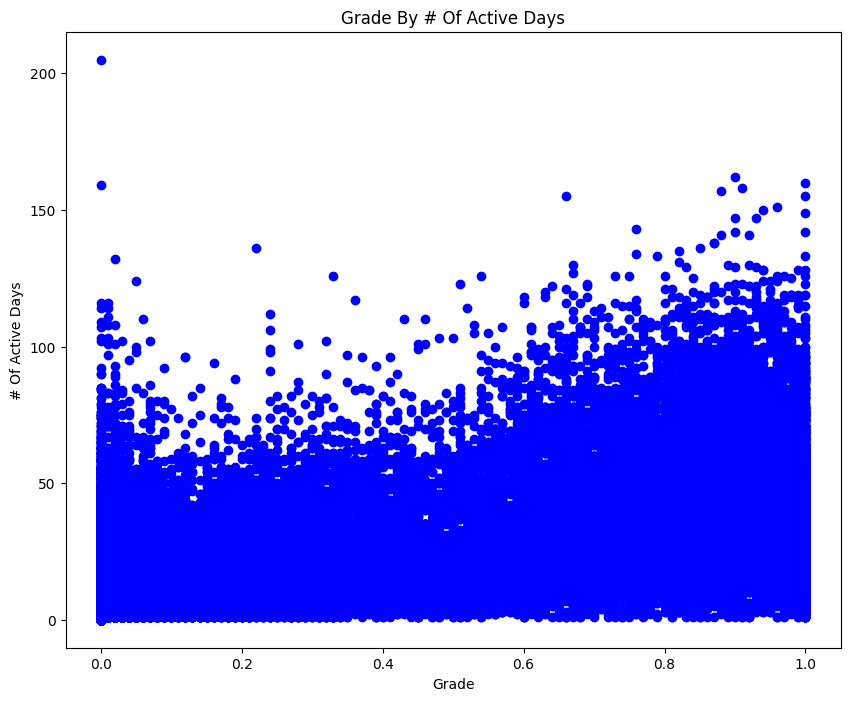

In [130]:
plt.figure(figsize=(10,8))
plt.scatter(x='Grade', y='N_Active_Days', data=huge_mooc_num, color='blue')
plt.title('Grade By # Of Active Days')
plt.xlabel('Grade')
plt.ylabel('# Of Active Days')
plt.show()

In [131]:
huge_mooc_num['Grade'].info()

<class 'pandas.core.series.Series'>
Int64Index: 396174 entries, 0 to 1199
Series name: Grade
Non-Null Count   Dtype  
--------------   -----  
396174 non-null  float64
dtypes: float64(1)
memory usage: 6.0 MB


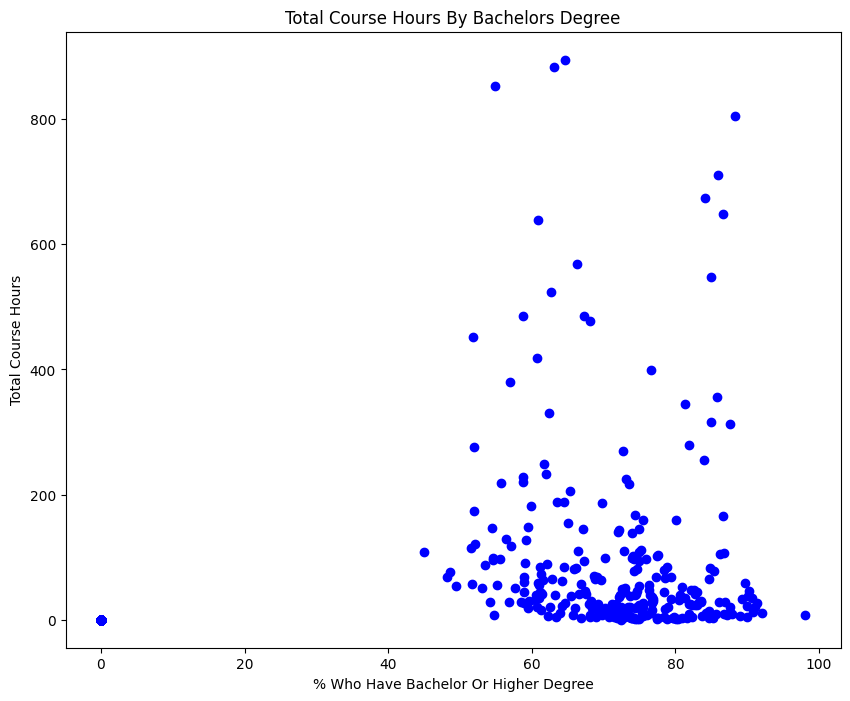

In [132]:
plt.figure(figsize=(10,8))
plt.scatter(x='Percentage_Bachelor_Or_Higher', y='Total_Course_Hours_k', data=huge_mooc_num, color='blue')
plt.title('Total Course Hours By Bachelors Degree')
plt.xlabel('% Who Have Bachelor Or Higher Degree')
plt.ylabel('Total Course Hours')
plt.show()

### Binary Prediction With Multivariable Logistic Regression - Model 1

The idea is to use demographic, behavioral, and course content-based numeric features to have a multivariable logistic regression model able to perform a binary prediction according to whether or not a student will complete a course, earn a certification or view the content of a course module in Massive Open Online Courses such as Udemy and edX.

In [133]:
multinomial_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [134]:
multinomial_reg

LogisticRegression(multi_class='multinomial')

In [135]:
for cert in huge_mooc_dataset['Certified'].unique():
    print(cert, ": ", len(huge_mooc_dataset[huge_mooc_dataset['Certified']==cert]))

0.0 :  382106
1.0 :  14068


In [136]:
certified_len = len(huge_mooc_dataset[huge_mooc_dataset['Certified']==1])
no_certified_len = len(huge_mooc_dataset[huge_mooc_dataset['Certified']==0])
print("Certified: ", certified_len)
print("Not Certified: ", no_certified_len)

Certified:  14068
Not Certified:  382106


In [137]:
X = huge_mooc_dataset[['Median_Hours_For_Certification', 'Total_Course_Hours_k', 
                       'Percentage_Greater_50P_Course_Content_Accessed', 'Percentage_Audited',
                      'Percentage_Certified', 'Percentage_Posted_In_Forum', 'Percentage_Bachelor_Or_Higher',
                      'Num_Subscribers', 'Num_Reviews', 'Percentage_Grade_Higher_Than_Zero',
                      'Participants', 'Number_Students_Audited_Higher_50P_Content', 'N_Chapters', 'N_Events']]
y = huge_mooc_dataset[['Certified']]

In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=13)

In [139]:
multinomial_reg.fit(X_train, y_train)

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [140]:
y_prediction = multinomial_reg.predict(X_test)

In [141]:
y_prediction.shape

(99044,)

In [142]:
from sklearn import metrics

In [143]:
confusion_mtx = metrics.confusion_matrix(y_test, y_prediction)

In [144]:
confusion_mtx

array([[94780,   686],
       [ 1434,  2144]])

Text(0.5, 427.9555555555555, 'Predicted label')

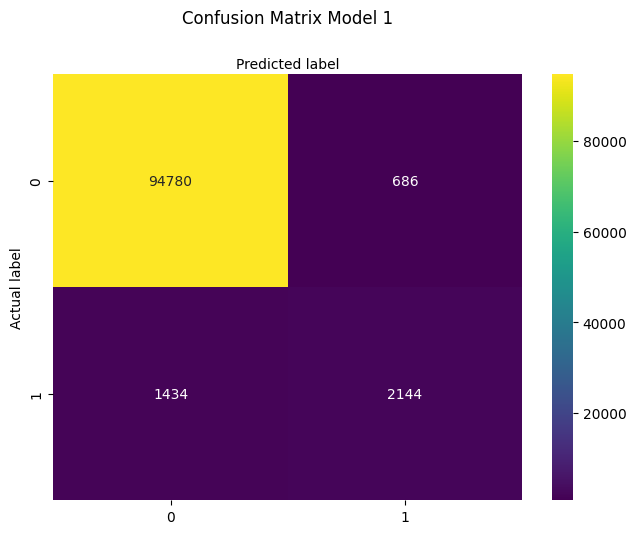

In [145]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_mtx), annot=True, cmap='viridis', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Model 1', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [146]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_prediction))
print("Precision: ", metrics.precision_score(y_test, y_prediction))
print("Recall: ", metrics.recall_score(y_test, y_prediction))

Accuracy:  0.9785953717539679
Precision:  0.7575971731448763
Recall:  0.5992174399105645


In [147]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     95466
         1.0       0.76      0.60      0.67      3578

    accuracy                           0.98     99044
   macro avg       0.87      0.80      0.83     99044
weighted avg       0.98      0.98      0.98     99044



- Accuracy -> TP + TN / (TP + TN +FP + FN)
- Precision -> TP / (TP + FP)
- Recall/Sensitivity -> TP / (TP + FN)
- F1-Score -> Combination of precision & recall -> TP / (TP + 1/2*(FP + FN))

The first model applies features regarding demography, behavior, and course content to predict the likelihood of a student completing a course.

It can be seen that even when the accuracy of the model is around 98%, the model is not performing well. It can not be reliable because the precision and recall statistics have a lower performance. Conducting to think that the model is not able to discern between true positives, true negatives, false positives, and false negatives, at least 75% of the time.

### Binary Prediction With Multivariable Logistic Regression - Model 2

In [148]:
honor_certificate = len(huge_mooc_dataset[huge_mooc_dataset['Honor_Code_Certificates']==1])
no_honor_certificate = len(huge_mooc_dataset[huge_mooc_dataset['Honor_Code_Certificates']==0])

print("Honor Certificate: ", honor_certificate)
print("No Honor Certificate: ", no_honor_certificate)

Honor Certificate:  235
No Honor Certificate:  395939


In [149]:
for honor_cert in huge_mooc_dataset['Honor_Code_Certificates'].unique():
    print(honor_cert, ": ", len(huge_mooc_dataset[huge_mooc_dataset["Honor_Code_Certificates"]==honor_cert]))

0.0 :  395939
1.0 :  235


In [150]:
X_2 = huge_mooc_dataset[['Median_Hours_For_Certification', 
                       'Percentage_Greater_50P_Course_Content_Accessed', 'Percentage_Audited',
                      'Percentage_Posted_In_Forum', 'Percentage_Bachelor_Or_Higher',
                     'Percentage_Grade_Higher_Than_Zero']]
y_2 = huge_mooc_dataset[['Honor_Code_Certificates']]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=.25, random_state=13)

In [152]:
multinomial_reg.fit(X_train, y_train)

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [153]:
y_prediction = multinomial_reg.predict(X_test)
conf_matrix = metrics.confusion_matrix(y_test, y_prediction)

In [154]:
conf_matrix

array([[98979,     3],
       [    1,    61]])

Text(0.5, 427.9555555555555, 'Predicted label')

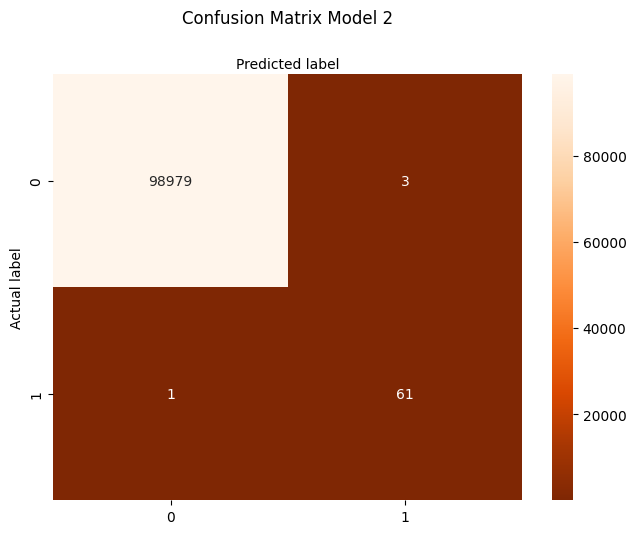

In [155]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Model 2', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [156]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_prediction))
print("Precision: ", metrics.precision_score(y_test, y_prediction))
print("Recall: ", metrics.recall_score(y_test, y_prediction))

Accuracy:  0.9999596139089697
Precision:  0.953125
Recall:  0.9838709677419355


In [157]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     98982
         1.0       0.95      0.98      0.97        62

    accuracy                           1.00     99044
   macro avg       0.98      0.99      0.98     99044
weighted avg       1.00      1.00      1.00     99044



This model uses students' behavioral and demographic features to predict whether or not a student would pay for earning an honor code certificate.

It can be seen that reducing the independent variables, translates into a more reliable model with higher values on the accuracy, precision, and recall statistics.

### Binary Prediction With Multivariable Logistic Regression - Model 3

In [158]:
viewed = len(huge_mooc_dataset[huge_mooc_dataset['Viewed']==1])
no_viewed = len(huge_mooc_dataset[huge_mooc_dataset['Viewed']==0])
print("Module Content Viewed: ", viewed)
print("Module Content Not Viewed: ", no_viewed)

Module Content Viewed:  278389
Module Content Not Viewed:  117785


In [159]:
for cont_viewed in huge_mooc_dataset['Viewed'].unique():
    print(cont_viewed, ": ", len(huge_mooc_dataset[huge_mooc_dataset['Viewed']==cont_viewed]))

0.0 :  117785
1.0 :  278389


In [160]:
X_3 = huge_mooc_dataset[['N_Chapters', 'N_Events', 'Num_Reviews', 'Num_Subscribers']]
y_3 = huge_mooc_dataset[['Viewed']]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.25, random_state=13)

In [162]:
multinomial_reg.fit(X_train, y_train)

/Users/nathalia/.pyenv/versions/py-3.10.7/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(multi_class='multinomial')

In [163]:
y_prediction = multinomial_reg.predict(X_test)

In [164]:
conf_matrix_3 = metrics.confusion_matrix(y_test, y_prediction)

In [165]:
conf_matrix_3

array([[29202,   474],
       [ 3709, 65659]])

Text(0.5, 427.9555555555555, 'Predicted label')

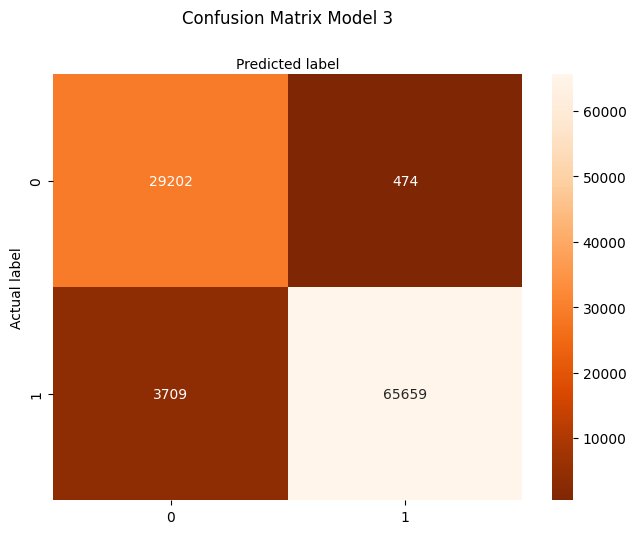

In [166]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(conf_matrix_3), annot=True, cmap='Oranges_r', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix Model 3', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [167]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_prediction))
print("Precision: ", metrics.precision_score(y_test, y_prediction))
print("Recall: ", metrics.recall_score(y_test, y_prediction))

Accuracy:  0.9577662453051169
Precision:  0.9928326251644414
Recall:  0.946531541921347


In [168]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93     29676
         1.0       0.99      0.95      0.97     69368

    accuracy                           0.96     99044
   macro avg       0.94      0.97      0.95     99044
weighted avg       0.96      0.96      0.96     99044



The last model uses features regarding course content attributes, to predict the decision of a student to view the content of a certain course module.

Using fewer highly correlated features has a positive impact on the reliability of the model. Having better statistics values for accuracy, precision, and recall. Then, the model can predict better results.

In [169]:
os.remove(edx_students_metrics_path)
os.remove(edx_courses_path)
os.remove(edx_platform_path)
os.remove(udemy_courses_path)